# Applied Data Science with Python: Course End Projects

CSV (AusApparalSales4thQrt2020.csv) file that covers the data.
https://drive.google.com/file/d/1kDD88iQcQiQ8LBG9gileq3Q7AWtM1D_y/view

Carllos Watts-Nogueira

Due: Jun 21 by 12:59am

# Step 1: Data Wrangling

In [58]:
# import libraries
import pandas as pd
import numpy as np

In [59]:
# 1.1) Load and Inspect Data
# Load CSV file
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

# few rows
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [60]:
# Viewing a small subset of data per run.
df.sample(18)

,Date,Time,State,Group,Unit,Sales
6410,17-Dec-2020,Morning,SA,Women,28,70000
3732,15-Nov-2020,Morning,VIC,Kids,32,80000
3947,17-Nov-2020,Evening,TAS,Seniors,5,12500
5822,10-Dec-2020,Morning,SA,Women,23,57500
6990,24-Dec-2020,Afternoon,NT,Women,15,37500
4876,29-Nov-2020,Afternoon,WA,Kids,8,20000
3179,8-Nov-2020,Evening,NSW,Seniors,30,75000
3695,14-Nov-2020,Evening,TAS,Seniors,2,5000
6408,17-Dec-2020,Morning,SA,Kids,32,80000
5551,7-Dec-2020,Afternoon,WA,Seniors,12,30000


In [61]:
# 1.2) Handle Missing Data
# Check for missing values
df.isna().sum()  # Counts of missing values
# df['Sales'].isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [62]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [63]:
df.notna().sum()  # Counts of non-missing values

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [64]:
df['Time'].value_counts()

Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64

In [65]:
df['Group'].value_counts()

Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64

In [66]:
df['State'].value_counts()

State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64

In [67]:
df.info()  # General information about data types
# Date object --> Datetime (1-OCT-2020)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [68]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [69]:
df['Date'].value_counts().sample(10)

Date
21-Oct-2020    84
12-Nov-2020    84
4-Oct-2020     84
28-Dec-2020    84
20-Oct-2020    84
8-Dec-2020     84
4-Nov-2020     84
7-Dec-2020     84
11-Nov-2020    84
27-Dec-2020    84
Name: count, dtype: int64

In [70]:
df2 = df.copy(deep=True) # Making a copy before modifying the DF
df2.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [71]:
# change the dtype date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [72]:
# reviweing after dtype change
# df.isnull().sum()
# df.isna().sum()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [74]:
# check duplicates
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

0

In [ ]:
# 1.3) Apply Normalization
# https://www.geeksforgeeks.org/machine-learning/normalization-vs-standardization/
from sklearn.preprocessing import MinMaxScaler

# Select columns for normalization
numeric_cols = ["Sales", "Unit"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()  # Verify normalization

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


In [76]:
# 1.4) Insights regarding the application of the GroupBy()
sales_by_group = df.groupby("Group")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
sales_by_group

,Group,Sales
1,Men,484.444444
3,Women,482.492063
0,Kids,480.142857
2,Seniors,473.571429


In [77]:
# 1.4.1) Insights regarding the application of the GroupBy()
df_grouped = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Order
df_grouped = df_grouped.sort_values(by=['State', 'Sales'], ascending=[True, False])

df_grouped

,State,Group,Sales
3,NSW,Women,113.158730
1,NSW,Men,112.206349
0,NSW,Kids,109.444444
2,NSW,Seniors,106.904762
5,NT,Men,28.015873
4,NT,Kids,27.619048
7,NT,Women,27.317460
6,NT,Seniors,26.126984
8,QLD,Kids,45.460317
9,QLD,Men,44.714286


In [78]:
# 1.4.2) Insights regarding the application of the GroupBy()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

df['Month'] = df['Date'].dt.strftime('%b')  # Ex: Oct, Nov, Dec

df_grouped_month = df.groupby(['Month', 'Group'])['Sales'].sum().reset_index()

month_order = ['Oct', 'Nov', 'Dec']
df_grouped_month['Month'] = pd.Categorical(df_grouped_month['Month'], categories=month_order, ordered=True)
df_grouped_month = df_grouped_month.sort_values(by=['Month', 'Sales'], ascending=[True, False])

df_grouped_month

,Month,Group,Sales
9,Oct,Men,163.396825
8,Oct,Kids,161.809524
10,Oct,Seniors,161.365079
11,Oct,Women,159.079365
4,Nov,Kids,125.285714
7,Nov,Women,125.158730
5,Nov,Men,123.587302
6,Nov,Seniors,121.730159
3,Dec,Women,198.253968
1,Dec,Men,197.460317


In [79]:
# 1.4.3) Insights regarding the application of the GroupBy()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

df['Month'] = df['Date'].dt.strftime('%b')

df_month_state = df.groupby(['Month', 'State'])['Sales'].sum().reset_index()

month_order = ['Oct', 'Nov', 'Dec']
df_month_state['Month'] = pd.Categorical(df_month_state['Month'], categories=month_order, ordered=True)
df_month_state = df_month_state.sort_values(by=['Month', 'State'])

df_month_state

,Month,State,Sales
14,Oct,NSW,147.349206
15,Oct,NT,40.777778
16,Oct,QLD,59.174603
17,Oct,SA,119.428571
18,Oct,TAS,39.460317
19,Oct,VIC,200.904762
20,Oct,WA,38.555556
7,Nov,NSW,125.015873
8,Nov,NT,21.952381
9,Nov,QLD,40.063492


In [80]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

df['Month'] = df['Date'].dt.strftime('%b')  # Ex: 'Oct', 'Nov', 'Dec'

df_month_sales = df.groupby('Month')['Sales'].sum().reset_index()

month_order = ['Oct', 'Nov', 'Dec']
df_month_sales['Month'] = pd.Categorical(df_month_sales['Month'], categories=month_order, ordered=True)
df_month_sales = df_month_sales.sort_values('Month')

df_month_sales

,Month,Sales
2,Oct,645.650794
1,Nov,495.761905
0,Dec,779.238095


# Data Wrangling - Report

1) **Data Cleaning and Type Inspection**

To ensure the dataset is free from missing or incorrect entries, the .info() function was used to check non-null counts across all columns.

**Data Type (dtype) Considerations**

**Potential dtype adjustments identified:**

- **Date**: originally an object; converted to datetime64[ns] using pd.to_datetime(..., format='%d-%b-%Y').
- **Unit**: although numeric and initially considered for conversion to int8 (range 0–127), the values were normalized using Min-Max scaling, which requires float precision. Therefore, it remains as float64.

**Categorical columns (dtypes left unchanged):**

- **Time** (object): values such as Morning, Afternoon, Evening.
- **State** (object): values such as WA, NT, SA, VIC, QLD, NSW, TAS.
- **Group** (object): values such as Kids, Men, Women, Seniors.
- **Unit** and **Sales**: retained as float64 for compatibility with normalization.

2) **Handling Missing or Incorrect Data**

- The dataset was checked using .isna().sum() and .isnull().sum(), and no missing values were detected.
- To further confirm, .notna().sum() verified that all expected values were present.
- Since there were no missing values, dropping rows (.dropna()) or imputing them was unnecessary.
- Duplicates were also evaluated using .duplicated().sum(), and none were found. Thus, df.drop_duplicates(inplace=True) was not required.

3) **Normalization**

- Given the nature of the data and the goal of scaling features to the same range, normalization was selected over standardization.
- The MinMaxScaler() from sklearn.preprocessing was applied to the Sales and Unit columns to scale values to the [0, 1] range, ensuring consistency for downstream modeling or comparison.

4) Data Aggregation Using groupby()

Using df.groupby("Group")["Sales"].sum() provided insights into total sales by customer segment, order by Sales:
Men, Women, Kids and Seniors.

# **Step** 2: Data Analysis


In [24]:
# 2.1) Descriptive Statistics
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,0.254054,0.254054
min,2020-10-01 00:00:00,0.000000,0.000000
25%,2020-10-23 00:00:00,0.095238,0.095238
50%,2020-11-15 12:00:00,0.190476,0.190476
75%,2020-12-08 00:00:00,0.380952,0.380952
max,2020-12-30 00:00:00,1.000000,1.000000
std,NaN,0.204784,0.204784


In [25]:
df["Date"].min(), df["Date"].max()

(Timestamp('2020-10-01 00:00:00'), Timestamp('2020-12-30 00:00:00'))

In [26]:
# mean
df[['Sales', 'Unit']].mean()

Sales    0.254054
Unit     0.254054
dtype: float64

In [27]:
# other way for same mean
mean_value = df.mean(numeric_only=True)
mean_value

Unit     0.254054
Sales    0.254054
dtype: float64

In [28]:
# other way mean np
np.mean(df['Sales'])

0.25405433778449654

In [29]:
# Mean, median, mode, standard deviation
print(f"Mean Sales: {(df['Sales'].mean())}")
print(f"Median Sales: {(df['Sales'].median())}")
print(f"Mode Sales: {df['Sales'].mode()[0]}")
print(f"Standard Deviation of Sales: {(df['Sales'].std())}")

Mean Sales: 0.25405433778449654
Median Sales: 0.1904761904761905
Mode Sales: 0.1111111111111111
Standard Deviation of Sales: 0.2047841710728009


In [30]:
# Mean, median, mode, standard deviation - np
print(f"Mean Sales: {np.mean(df['Sales'])}")
print(f"Median Sales: {np.median(df['Sales'])}")
print(f"Mode Sales: {df['Sales'].mode()[0]}")
print(f"Standard Deviation of Sales: {np.std(df['Sales'])}")

Mean Sales: 0.25405433778449654
Median Sales: 0.1904761904761905
Mode Sales: 0.1111111111111111
Standard Deviation of Sales: 0.20477062669823184


In [ ]:
# 2.2) Identify Best & Worst Performing Groups
# Group sales by demographic
sales_by_group = df.groupby("Group")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
sales_by_group

,Group,Sales
1,Men,484.444444
3,Women,482.492063
0,Kids,480.142857
2,Seniors,473.571429


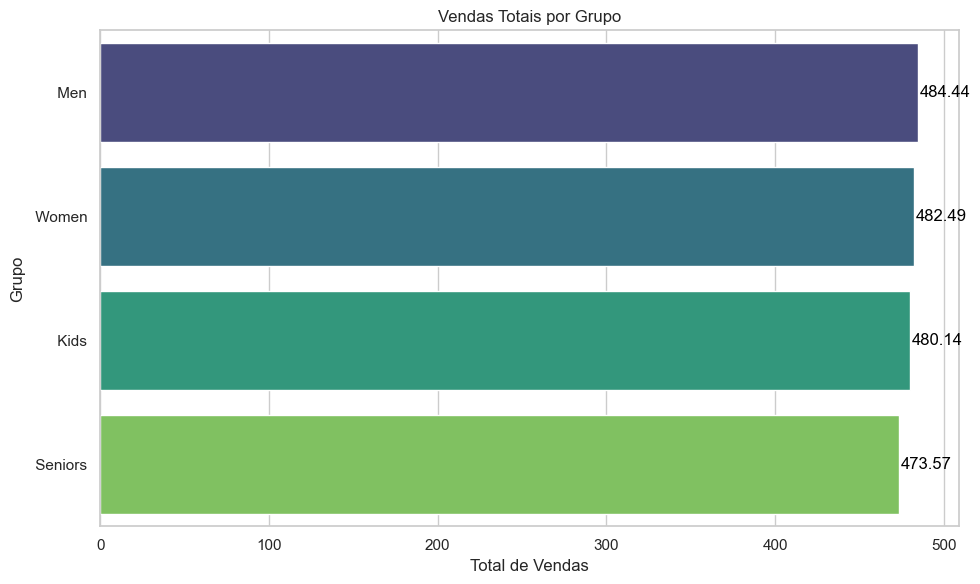

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e ordenar
sales_by_group = df.groupby("Group")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras com a ordem definida manualmente
order = sales_by_group["Group"].tolist()
barplot = sns.barplot(
    data=sales_by_group,
    x="Sales",
    y="Group",
    hue="Group",              # Adiciona hue para aplicar a paleta corretamente
    palette="viridis",
    order=order,
    legend=False              # Não precisa de legenda, já está no eixo Y
)

# Adicionar os valores ao lado das barras com precisão
for patch in barplot.patches:
    width = patch.get_width()
    y_center = patch.get_y() + patch.get_height() / 2
    barplot.text(width + 1, y_center, f'{width:.2f}', va='center', ha='left', color='black')

# Títulos e rótulos
plt.title("Total Sales by Group")
plt.xlabel("Total Sales")
plt.ylabel("Group")
plt.tight_layout()

plt.show()

In [32]:
# Identify highest sales groups
highest_sales_group = sales_by_group.loc[sales_by_group["Sales"].idxmax()]
highest_sales_group

Group           Men
Sales    484.444444
Name: 1, dtype: object

In [33]:
# Identify highest and lowest sales groups
lowest_sales_group = sales_by_group.loc[sales_by_group["Sales"].idxmin()]
lowest_sales_group

Group       Seniors
Sales    473.571429
Name: 2, dtype: object

In [34]:
# 2.3.1) Generate Reports
# Resample data for weekly
weekly_sales = df.resample("W", on="Date")["Sales"].sum() # 2021-01-03 (week started 2020-12-28 ended 2021-01-03)
weekly_sales

Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64

In [35]:
weekly_sales = weekly_sales.sort_values(ascending=False)
weekly_sales

Date
2020-12-27    183.047619
2020-12-20    182.317460
2020-12-13    181.492063
2020-12-06    169.412698
2020-10-11    152.777778
2020-10-25    151.587302
2020-10-18    150.476190
2020-11-01    122.460317
2020-11-29    117.698413
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-08    113.809524
2020-10-04     84.857143
2021-01-03     79.571429
Name: Sales, dtype: float64

In [81]:
# Garantir que a coluna 'Date' está em datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extrair os períodos (ano e mês)
meses_unicos = df["Date"].dt.to_period("M").unique()
print(meses_unicos)

<PeriodArray>
['2020-10', '2020-11', '2020-12']
Length: 3, dtype: period[M]


In [ ]:
# Converter a coluna 'Date' para datetime, se ainda não estiver
df["Date"] = pd.to_datetime(df["Date"])

# Definir o intervalo desejado
inicio = "2020-10-01"
fim = "2020-10-31"

# Filtrar as datas e somar as vendas
vendas_periodo = df.loc[(df["Date"] >= inicio) & (df["Date"] <= fim), "Sales"].sum()

print(f"Vendas totais de out/2020: {vendas_periodo:.2f}")

Vendas totais de out a nov/2020: 645.65


In [56]:
# Converter a coluna 'Date' para datetime, se ainda não estiver
df["Date"] = pd.to_datetime(df["Date"])

# Definir o intervalo desejado
inicio = "2020-11-01"
fim = "2020-11-30"

# Filtrar as datas e somar as vendas
vendas_periodo = df.loc[(df["Date"] >= inicio) & (df["Date"] <= fim), "Sales"].sum()

print(f"Vendas totais de nov/2020: {vendas_periodo:.2f}")

Vendas totais de nov/2020: 495.76


In [57]:
# Converter a coluna 'Date' para datetime, se ainda não estiver
df["Date"] = pd.to_datetime(df["Date"])

# Definir o intervalo desejado
inicio = "2020-12-01"
fim = "2020-12-31"

# Filtrar as datas e somar as vendas
vendas_periodo = df.loc[(df["Date"] >= inicio) & (df["Date"] <= fim), "Sales"].sum()

print(f"Vendas totais de nov/2020: {vendas_periodo:.2f}")

Vendas totais de nov/2020: 779.24


In [36]:
# 2.3.2) Generate Reports
# Resample data for monthly summaries
monthly_sales = df.resample("ME", on="Date")["Sales"].sum() #'M' is deprecated and will be removed in a future version, please use 'ME' instead.
monthly_sales

Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: ME, Name: Sales, dtype: float64

In [37]:
# 2.3.3) Generate Reports
# Resample data for quarterly summaries
quarterly_sales = df.resample("QE", on="Date")["Sales"].sum() #'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
quarterly_sales

Date
2020-12-31    1920.650794
Freq: QE-DEC, Name: Sales, dtype: float64

# Data Analysis - Report

**Descriptive Statistical Analysis**

A descriptive statistical analysis was conducted on the Sales and Unit columns using standard techniques such as mean, median, mode, and standard deviation.

- Mean Sales: 0.2541
- Median Sales: 0.1905
- Mode Sales: 0.1111
- Standard Deviation of Sales: 0.2048

**Sales by Group Analysis**

The dataset was analyzed to identify the groups with the highest and lowest total sales:

- Highest Total Sales: Men
- Lowest Total Sales: Seniors

**Time-Based Resampling**

Time-series resampling was performed to summarize sales over different periods using the resample() method.

- Weekly Resampling --> Used: df.resample("W", on="Date")["Sales"].sum()
- - Key insights:
- - - Highest weekly sales: 2020-12-27 → 183.05
- - - Lowest weekly sales: 2021-01-03 → 79.57

- Quarterly Resampling --> Used: df.resample("QE", on="Date")["Sales"].sum()
- - Key insight:
- - - Total quarterly sales (Oct, Nov, Dec 2020 – ending 2020-12-31)= 1920.650794

**Libraries Utilized**
- NumPy
- Pandas
- (Note: SciPy was not used in this analysis.)

# Step 3: Data Visualization


In [44]:
# Library
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

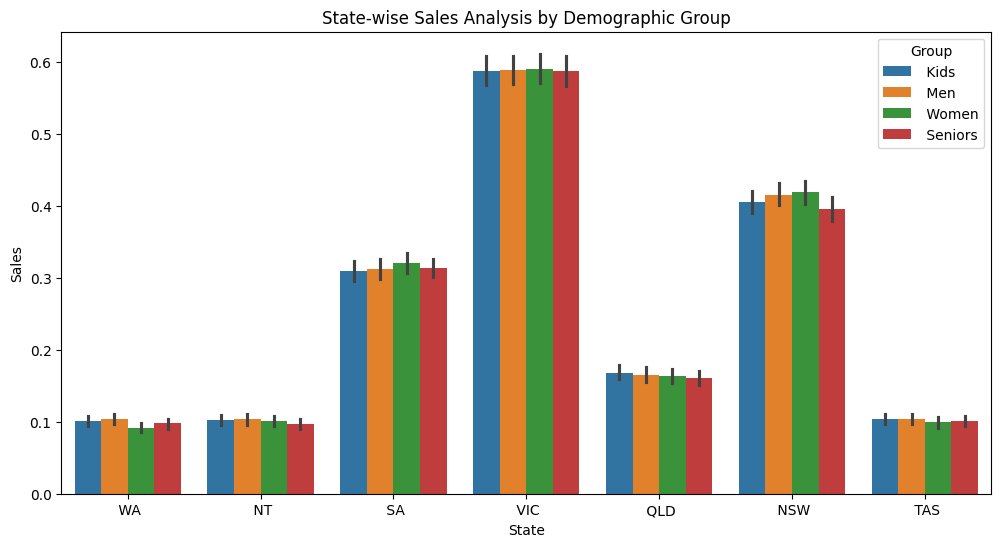

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # 3.1)
# State-wise Sales Analysis for Different Demographic Group
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group') #Seaborn implicitly calculates the mean (estimator=mean by default) 0.0 to 0.6
plt.title('State-wise Sales Analysis by Demographic Group')
plt.xticks(rotation=0)

filename = '/content/state_sales_analysis.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

files.download(filename)

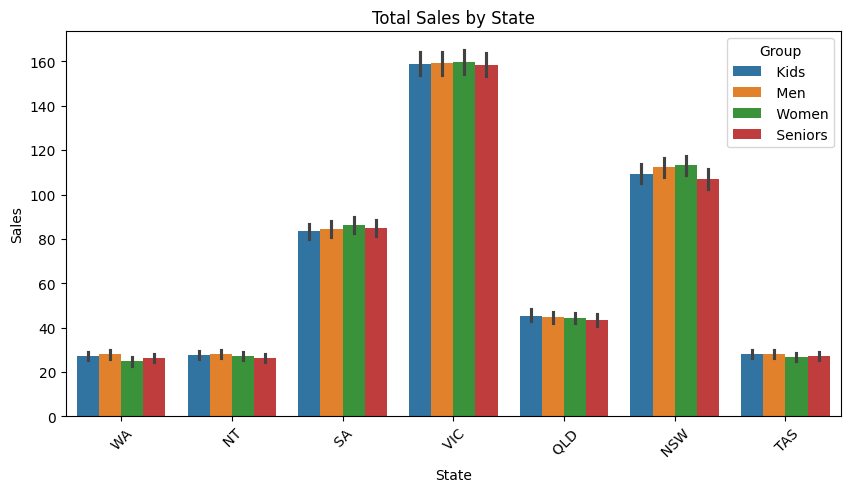

In [ ]:
# Bar plot for sales across states
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='State', y='Sales', hue='Group', estimator=sum)
plt.xticks(rotation=45)
plt.title('Total Sales by State')
plt.show()

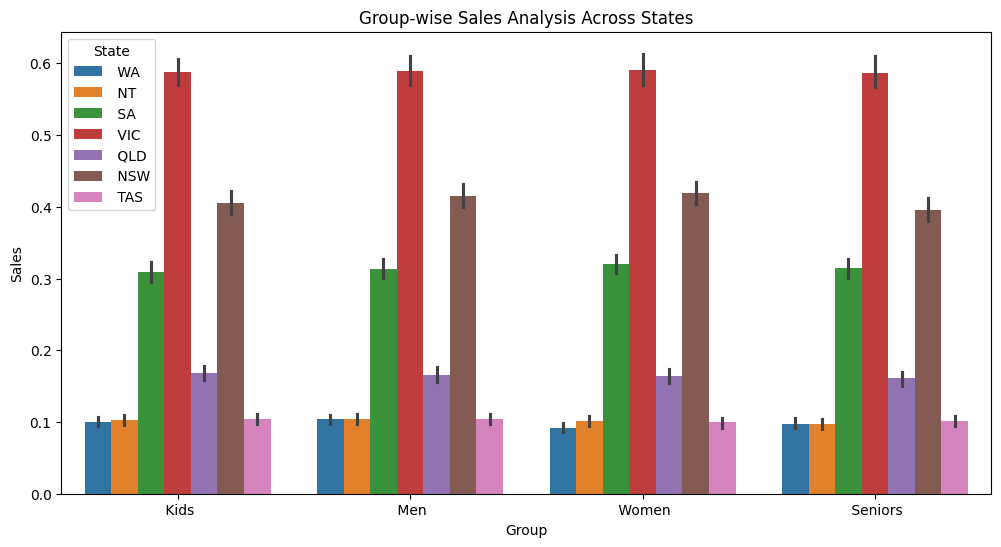

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 3.2)
# Group-wise Sales Analysis Across Various States#
plt.figure(figsize=(12, 6))
sns.barplot(x="Group", y="Sales", hue="State", data=df)
plt.title("Group-wise Sales Analysis Across States")
plt.xticks(rotation=0)

filename = '/content/group_sales_analysis.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

files.download(filename)

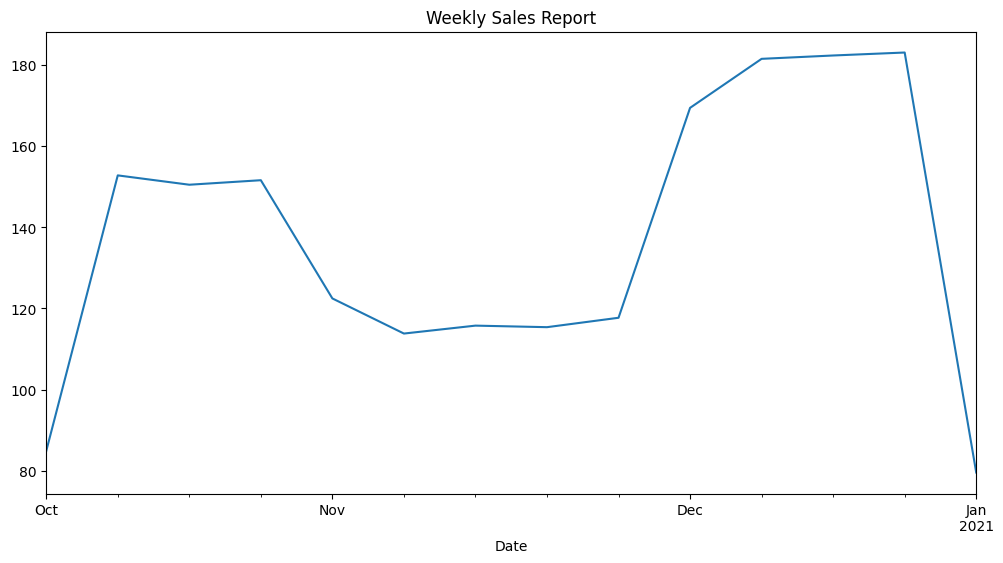

In [ ]:
# Time-of-the-Day Analysis (Peak & Off-Peak Sales)
# Weekly Sales Report
weekly_sales = df.resample("W", on="Date")["Sales"].sum()
weekly_sales.plot(title="Weekly Sales Report", figsize=(12, 6))
plt.show()

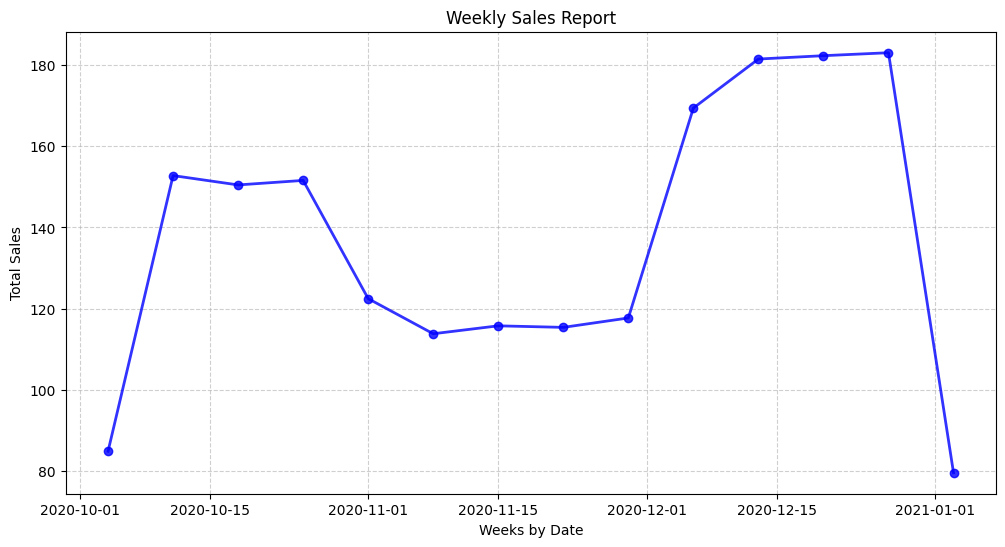

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Time-of-the-Day Analysis (Peak & Off-Peak Sales)
# Weekly Sales Report
weekly_sales = df.resample("W", on="Date")["Sales"].sum()

# Plot with markers and grid
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker="o", linestyle="-", color="b", linewidth=2, alpha=0.8)

# Enhancing readability
plt.title("Weekly Sales Report")
plt.xlabel("Weeks by Date")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines for subtle visibility

filename = '/content/total_sales_report.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

files.download(filename)

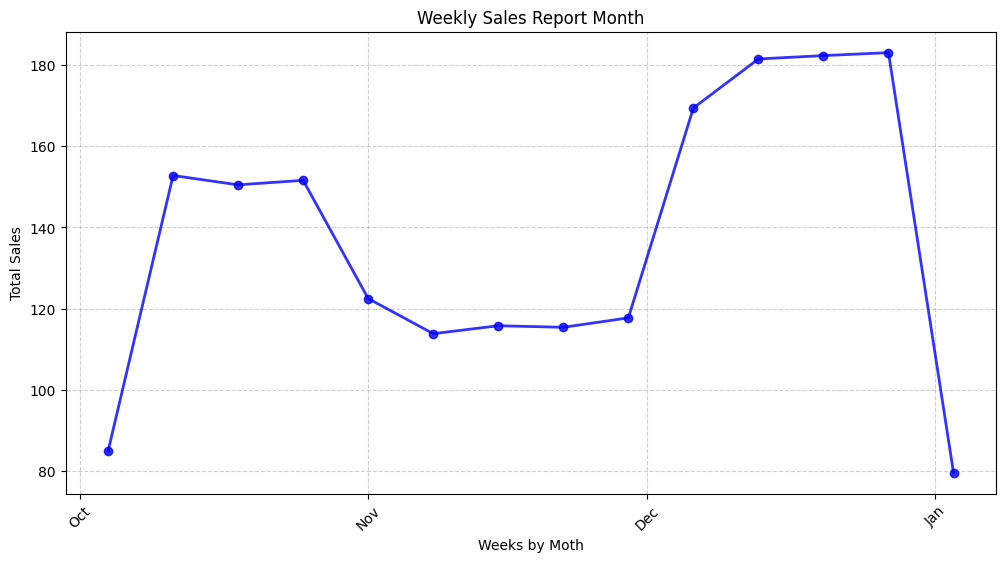

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker="o", linestyle="-", color="b", linewidth=2, alpha=0.8)
plt.title("Weekly Sales Report Month")
plt.xlabel("Weeks by Moth")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.6)

# Formatando o eixo X para exibir apenas os meses
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))  # Exibe meses abreviados (Jan, Feb, etc.)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Define os meses como principais marcadores

#
plt.xticks(rotation=45)

#
filename = '/content/total_sales_report_month.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

files.download(filename)

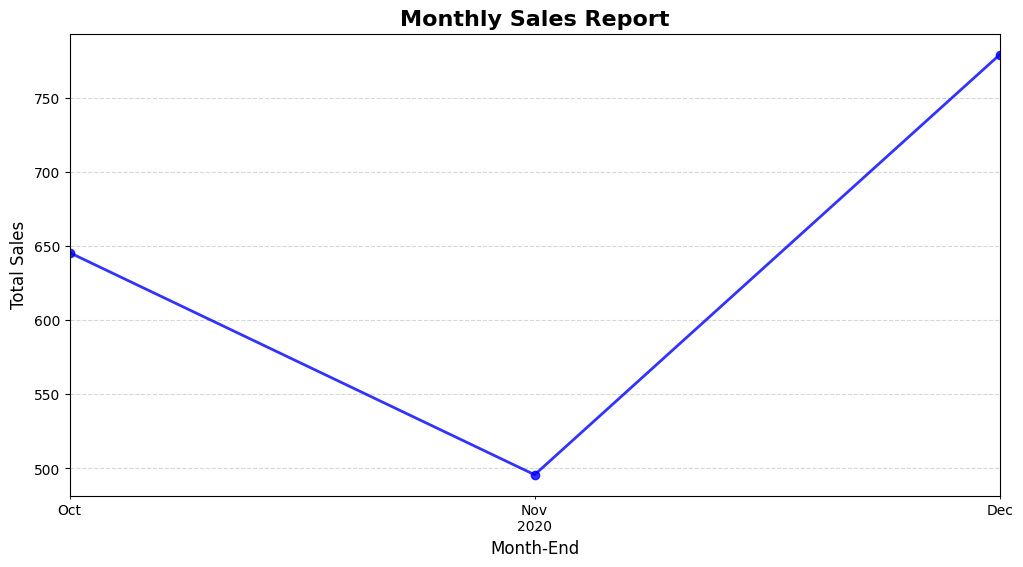

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Monthly Sales Report (use 'ME' instead of 'M')
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", linestyle="-", color="b", linewidth=2, alpha=0.8)
plt.title("Monthly Sales Report", fontsize=16, fontweight="bold")
plt.xlabel("Month-End", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

filename = '/content/monthly_sales_report.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

files.download(filename)

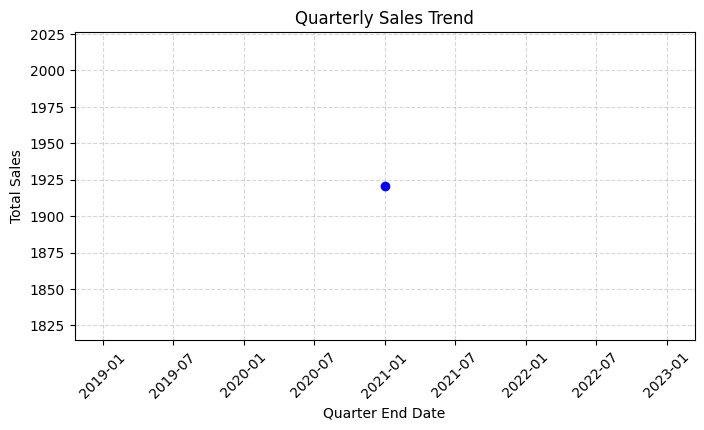

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Quarterly
plt.figure(figsize=(8, 4))
plt.plot(quarterly_sales.index, quarterly_sales.values, marker="o", linestyle="-", color="b")
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter End Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

filename = '/content/quarterly_sales_trend.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

files.download(filename)

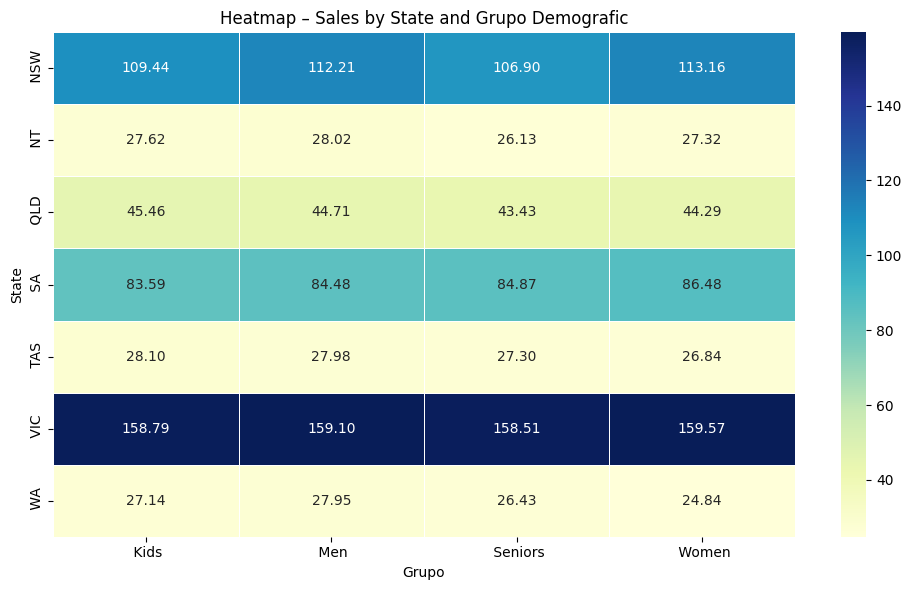

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
heatmap_data = df.groupby(['State', 'Group'])['Sales'].sum().unstack() # unstack method that pivots one level of the row index into columns.

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Heatmap – Sales by State and Grupo Demografic")
plt.ylabel("State")
plt.xlabel("Grupo")
plt.tight_layout()

filename = '/content/heatmap_sales_state_group.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

files.download(filename)

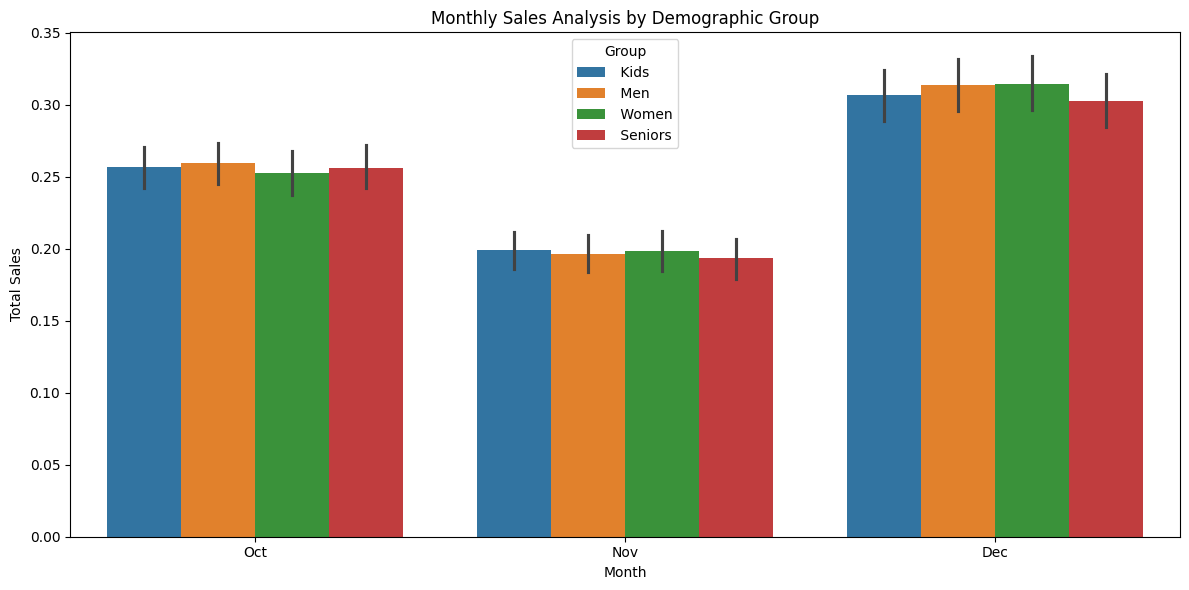

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

df['Month'] = df['Date'].dt.strftime('%b')  # Ex: 'Oct', 'Nov', 'Dec'

month_order = ['Oct', 'Nov', 'Dec']  # ajuste se tiver mais meses
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Sales', hue='Group', order=month_order)

plt.title("Monthly Sales Analysis by Demographic Group")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title='Group')
plt.tight_layout()

filename = '/content/monthly_sales_analysis.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

from google.colab import files
files.download(filename)

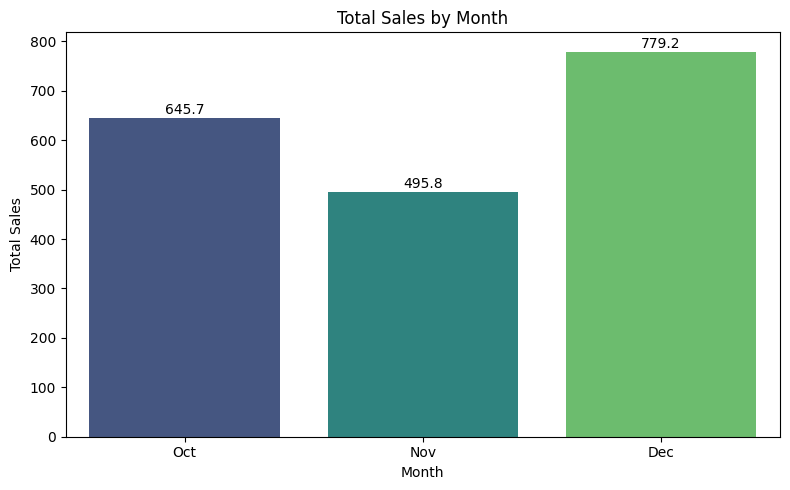

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_month_sales, x='Month', y='Sales', hue='Month', palette='viridis', legend=False)

for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = value
    ax.text(x, y + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.title("Total Sales by Month")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.tight_layout()

filename = '/content/total_sales_by_month.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

files.download(filename)


#  Data Visualization - Report

Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing.
- - import matplotlib.pyplot as plt
- - import seaborn as sns

The dashboard should encompass key parameters:

- State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
- - We can see the highest state Sales: VIC, and the group is similar with slightly higher Women Sales.  
- - We can see the median state Sales: SA and NSW, and also the group is similar with slightly higher Women Sales in both states.
- - We can see the lowest state Sales: QLD, WA, NT, TAS
- - - QLD, and the group is similar with slightly higher Kids Sales.
- - - WA, and the group is similar with slightly higher Men Sales.
- - - NT, and the group is similar with slightly higher Men Sales.
- - - TAS, and the group is similar with slightly higher Kids and Man Sales.

- Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
- - We can see the highest state Sales for all groups= VIC.  
- - We can see the lowest state Sales for all groups= QLD, WA, NT, TAS.

- Time-of-the-day analysis:
- - Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams.
- - This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.
- - Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
- - The dashboard must contain daily, weekly, monthly, and quarterly charts.
- - (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
- - Include your recommendation and indicate why you are choosing the recommended visualization package.

- -  By week
- -  - We can see the peak is the lasts weeks of December,    
- -  - We can see the off-peak the first weeks of November,

- - - By month
- - - We can see the highest Sales on December,    
- - - We can see the median Sales on October,
- - - We can see the Lowest Sales on November,

- -  By quarterly
- - - We can only see one quarterly, because the data have only one, in this case is no possible compere with others quarterlies.
    

# Step 4 - Final Report Generation

**Findings**

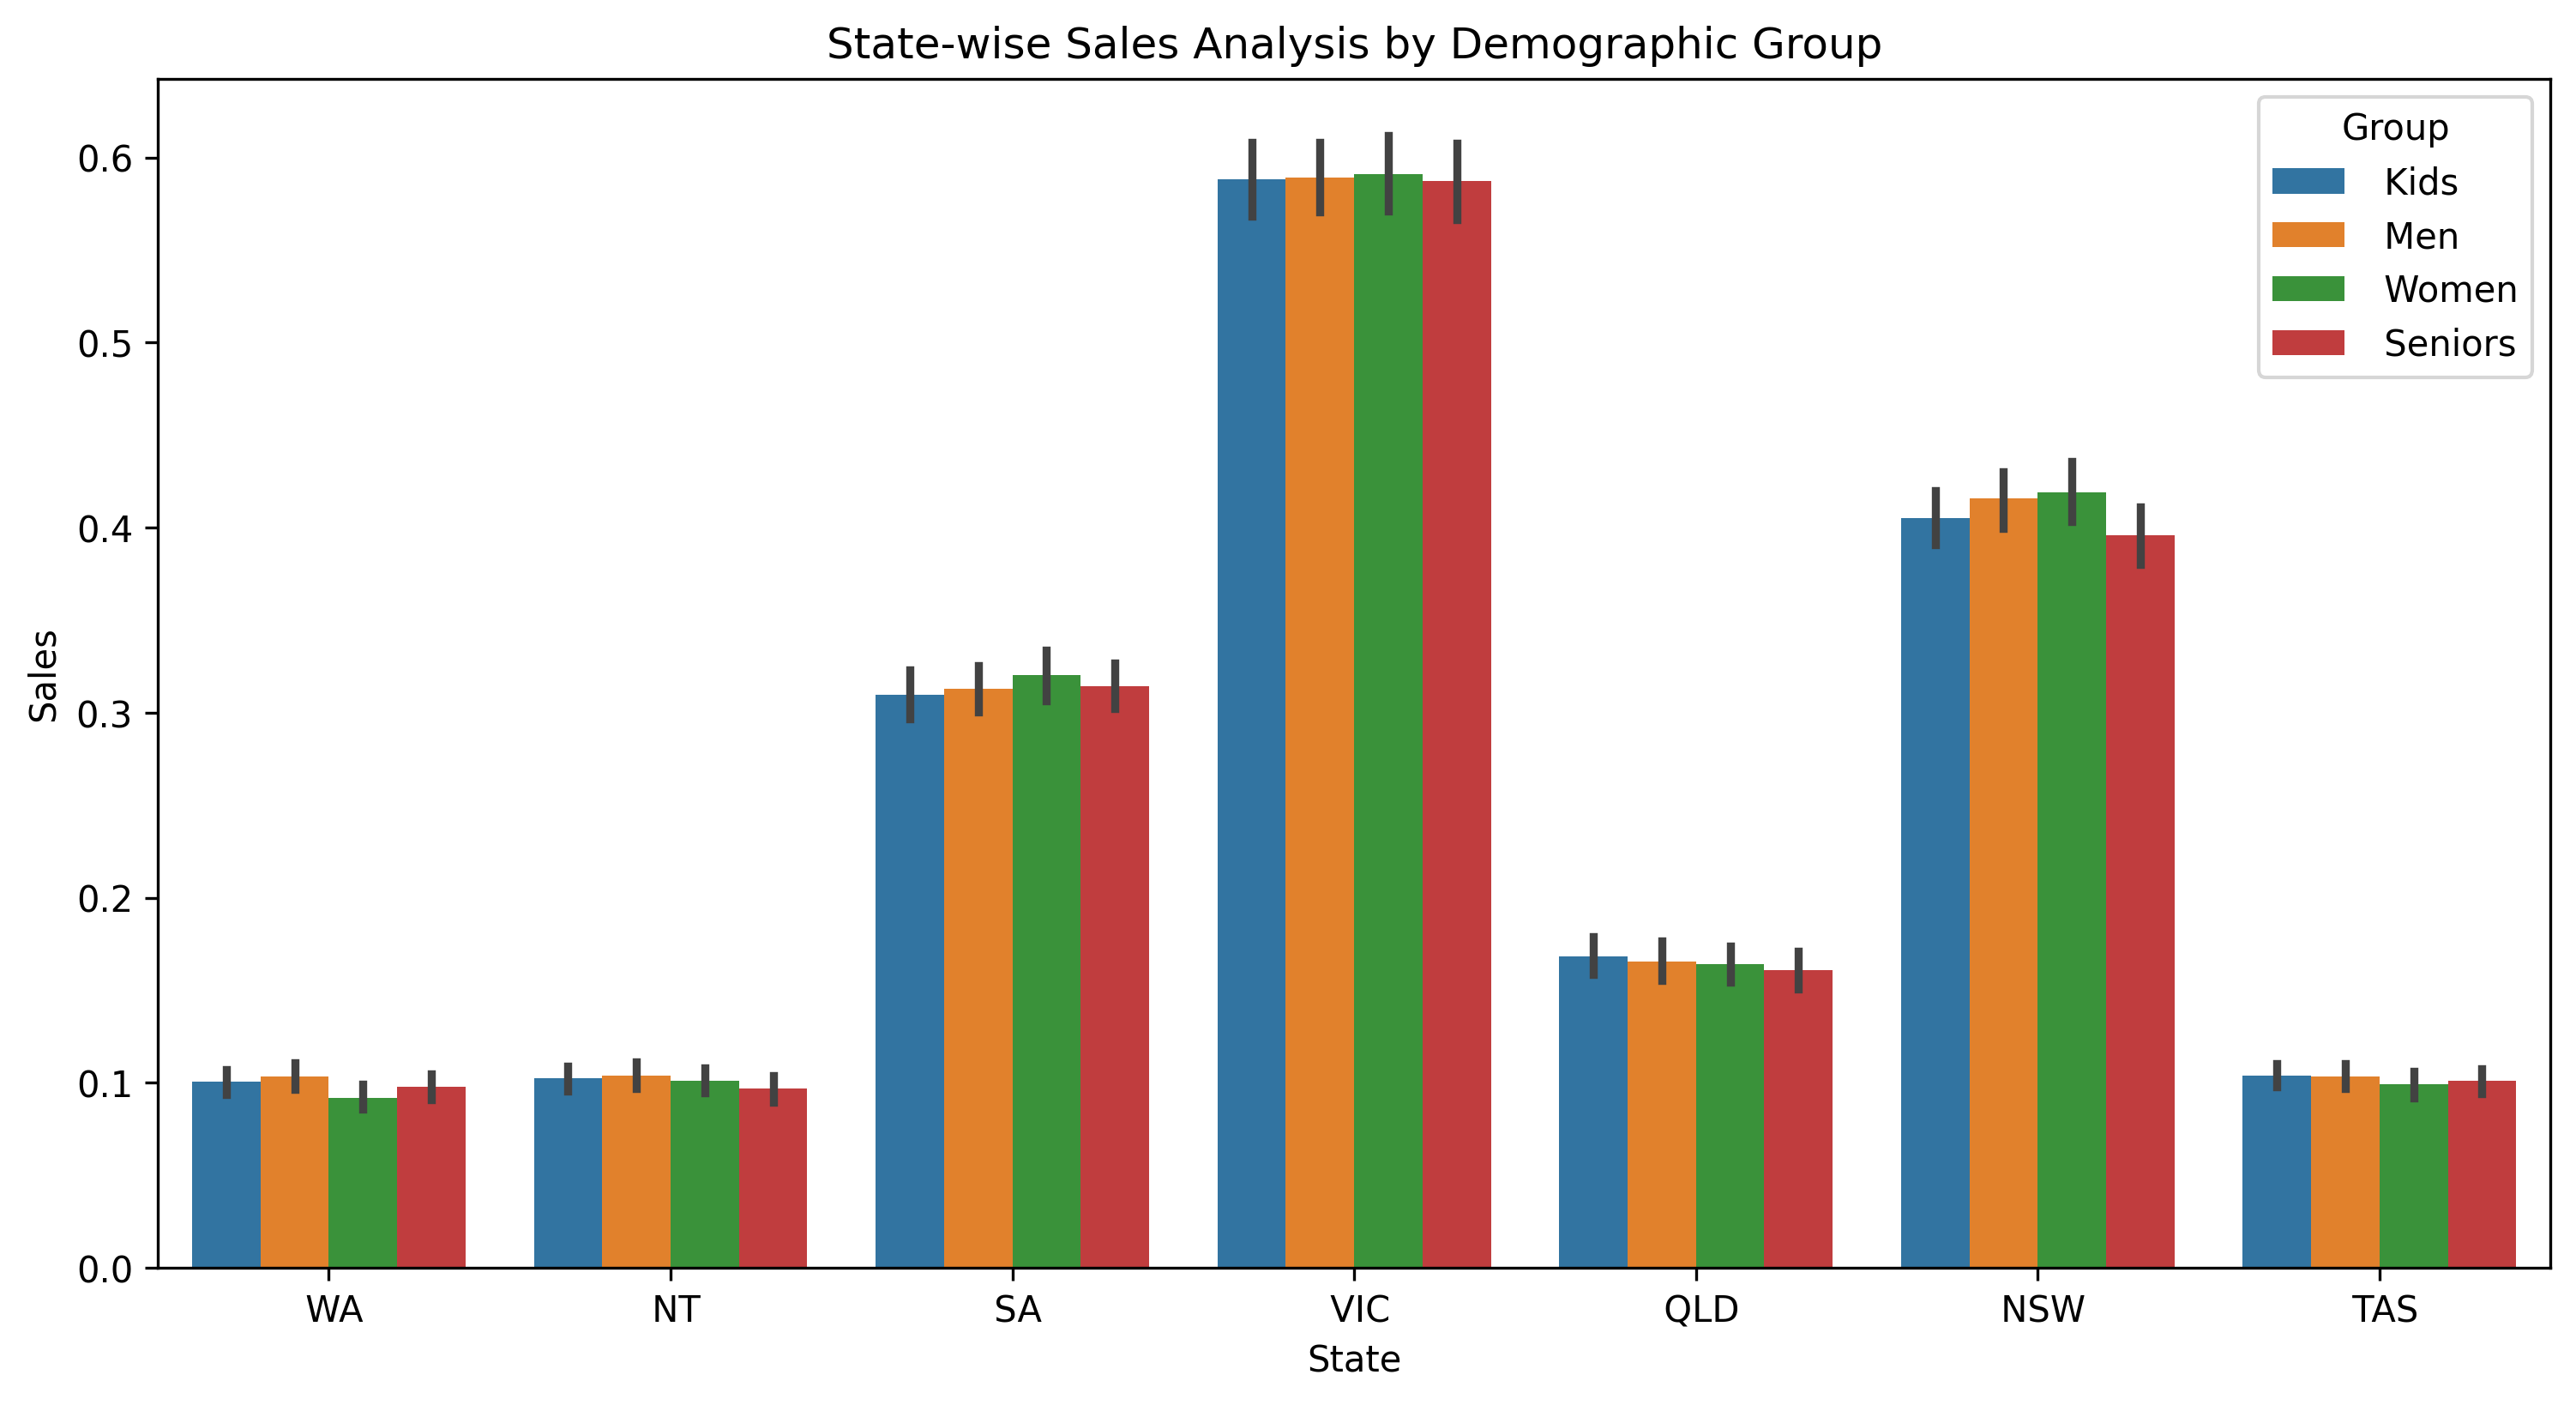


- (VIC) was the top-performing state in terms of total sales, the "Women" group led in sales with a total of approximately 159.57, slightly surpassing the other groups: Men (159.10), Kids (158.79), and Seniors (158.51).
- While the differences between the groups are subtle, this result indicates that the female demographic stood out as the most profitable segment in the region.
- This could be the result of well-targeted campaigns, a stronger preference for certain products, or more active engagement during previously identified peak periods.
- This insight can be valuable for the sales and marketing team when adjusting local strategies, prioritizing personalized offers tailored to the female audience in VIC, especially during high-traffic times like the end of December.

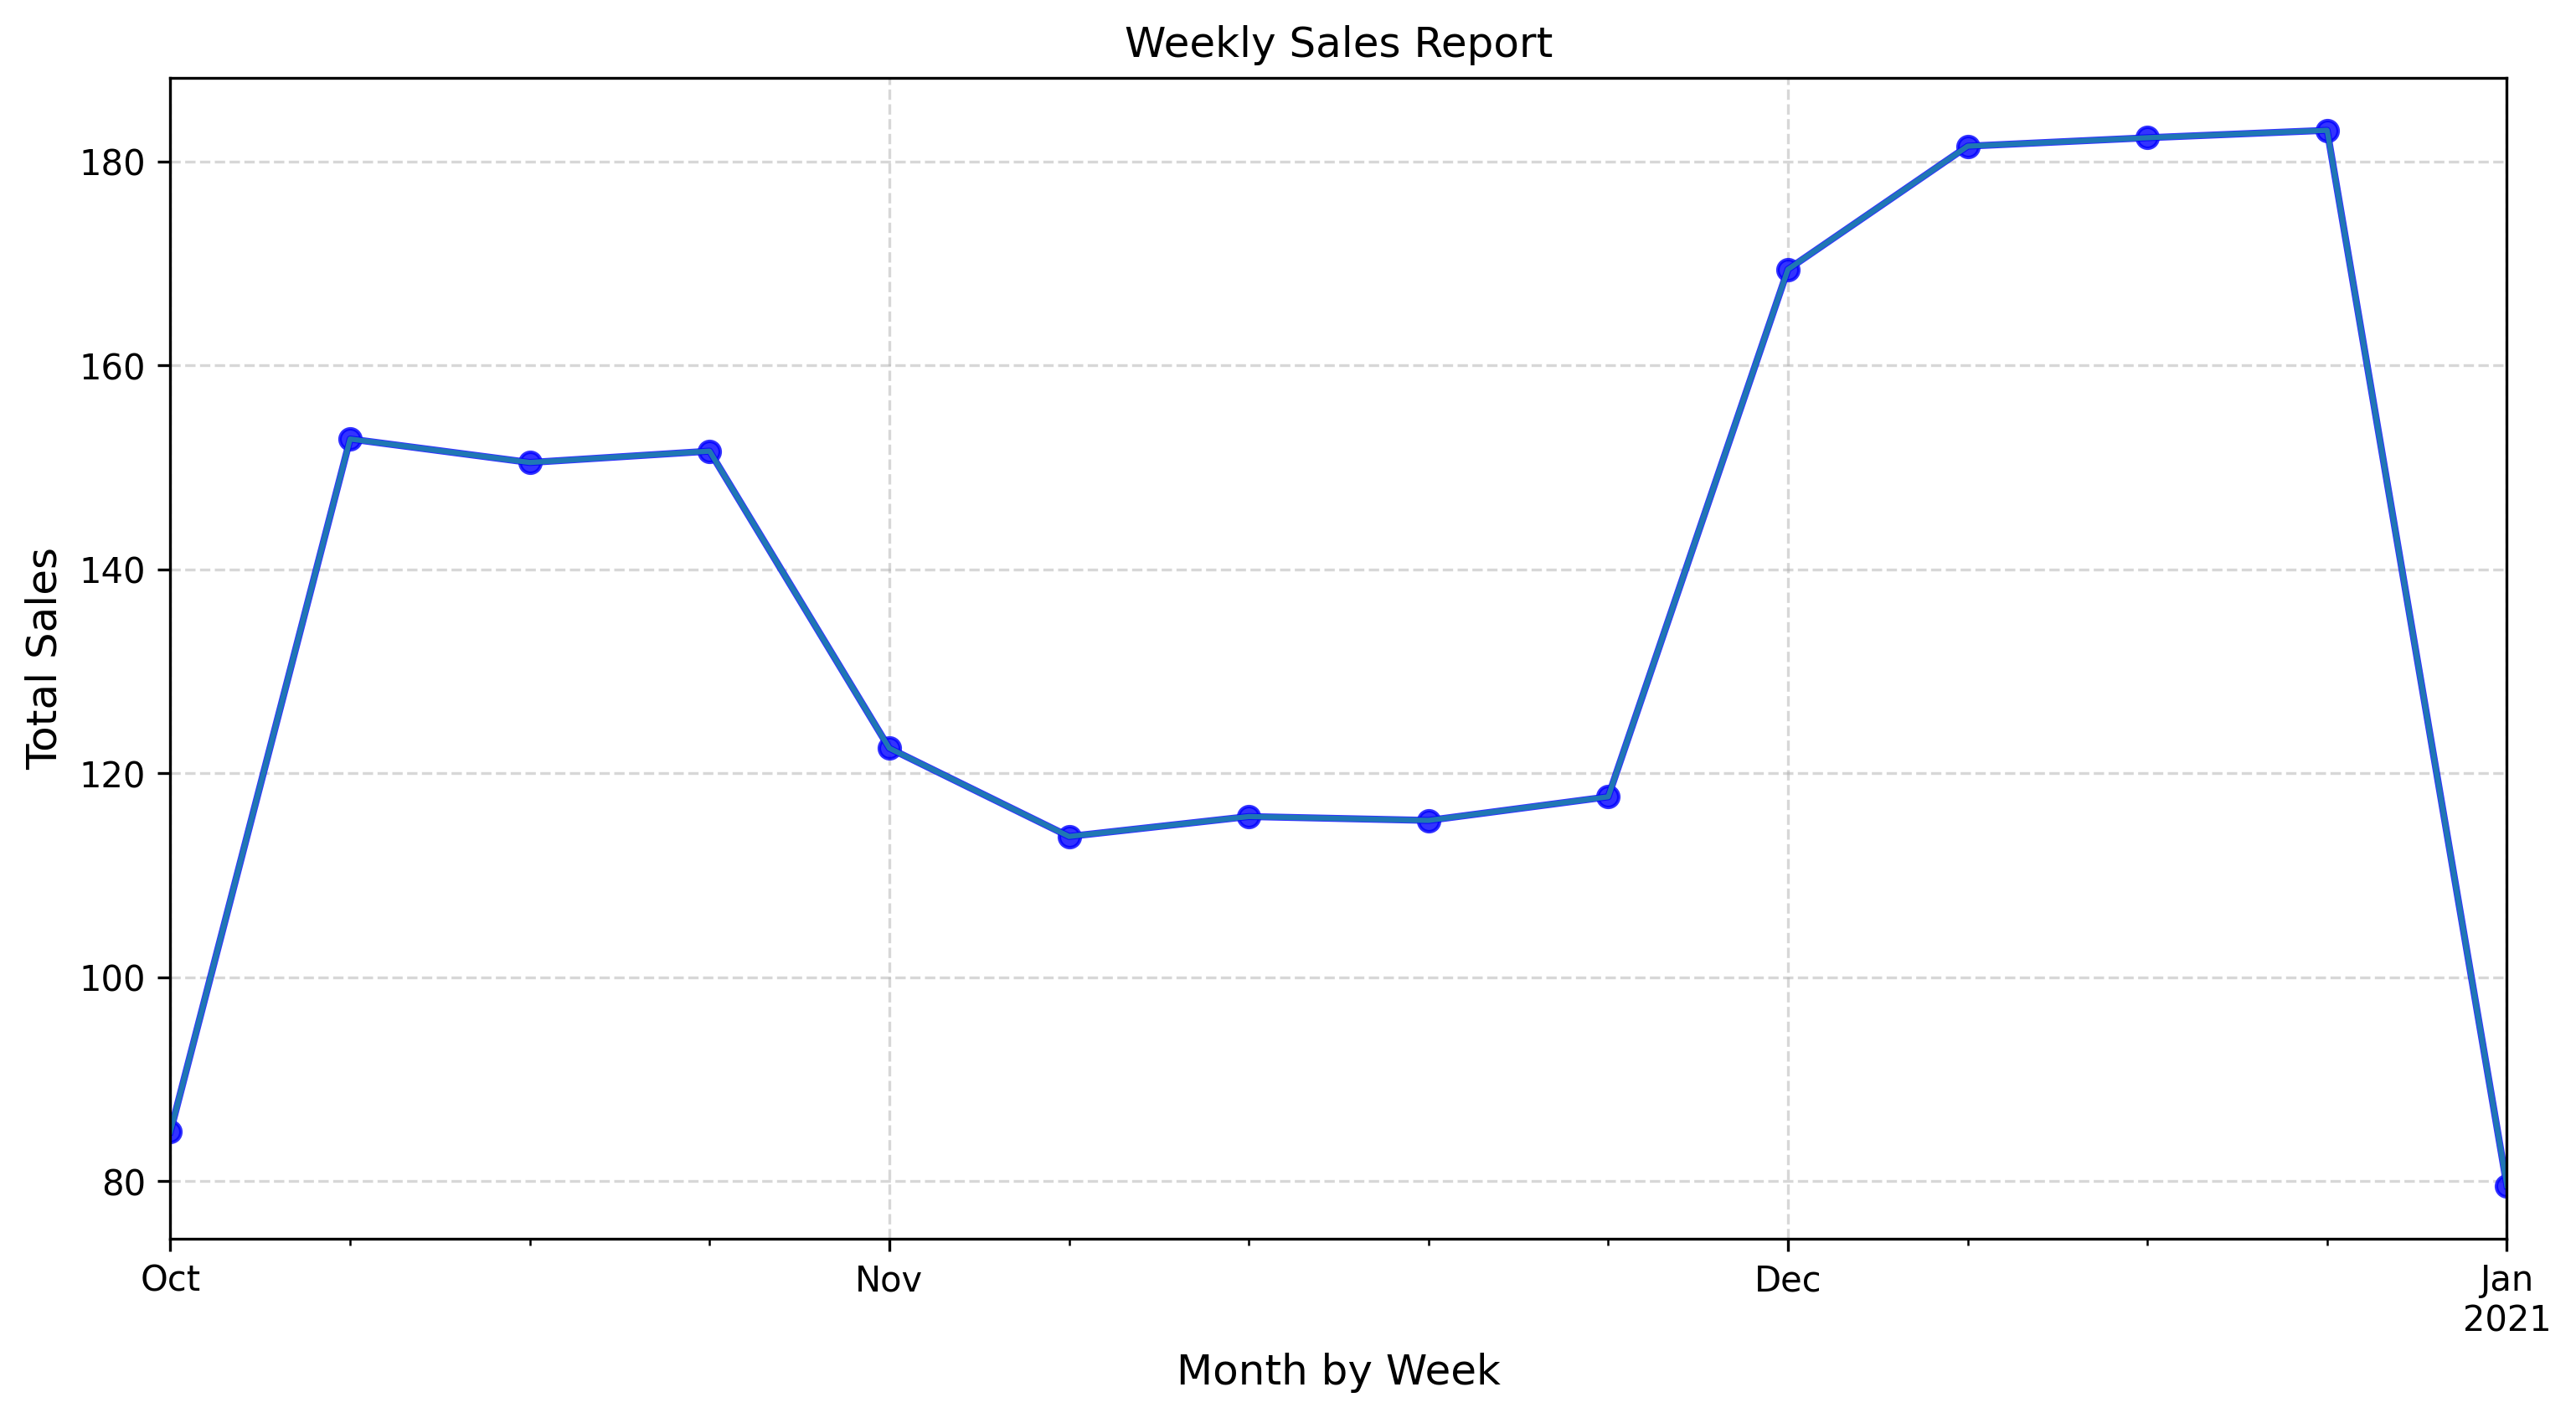

- The sales peaked in late December, suggesting seasonal factors or holiday-driven behavior.

**Interesting Tidbits**
- Despite being a smaller segment, Kids outperformed Seniors in this stats: NSW, NT, QLD, TAS, VIC, WA.
- Despite being a smaller segment, Seniors outperformed Kids only in this state: SA.

**Data Insights**

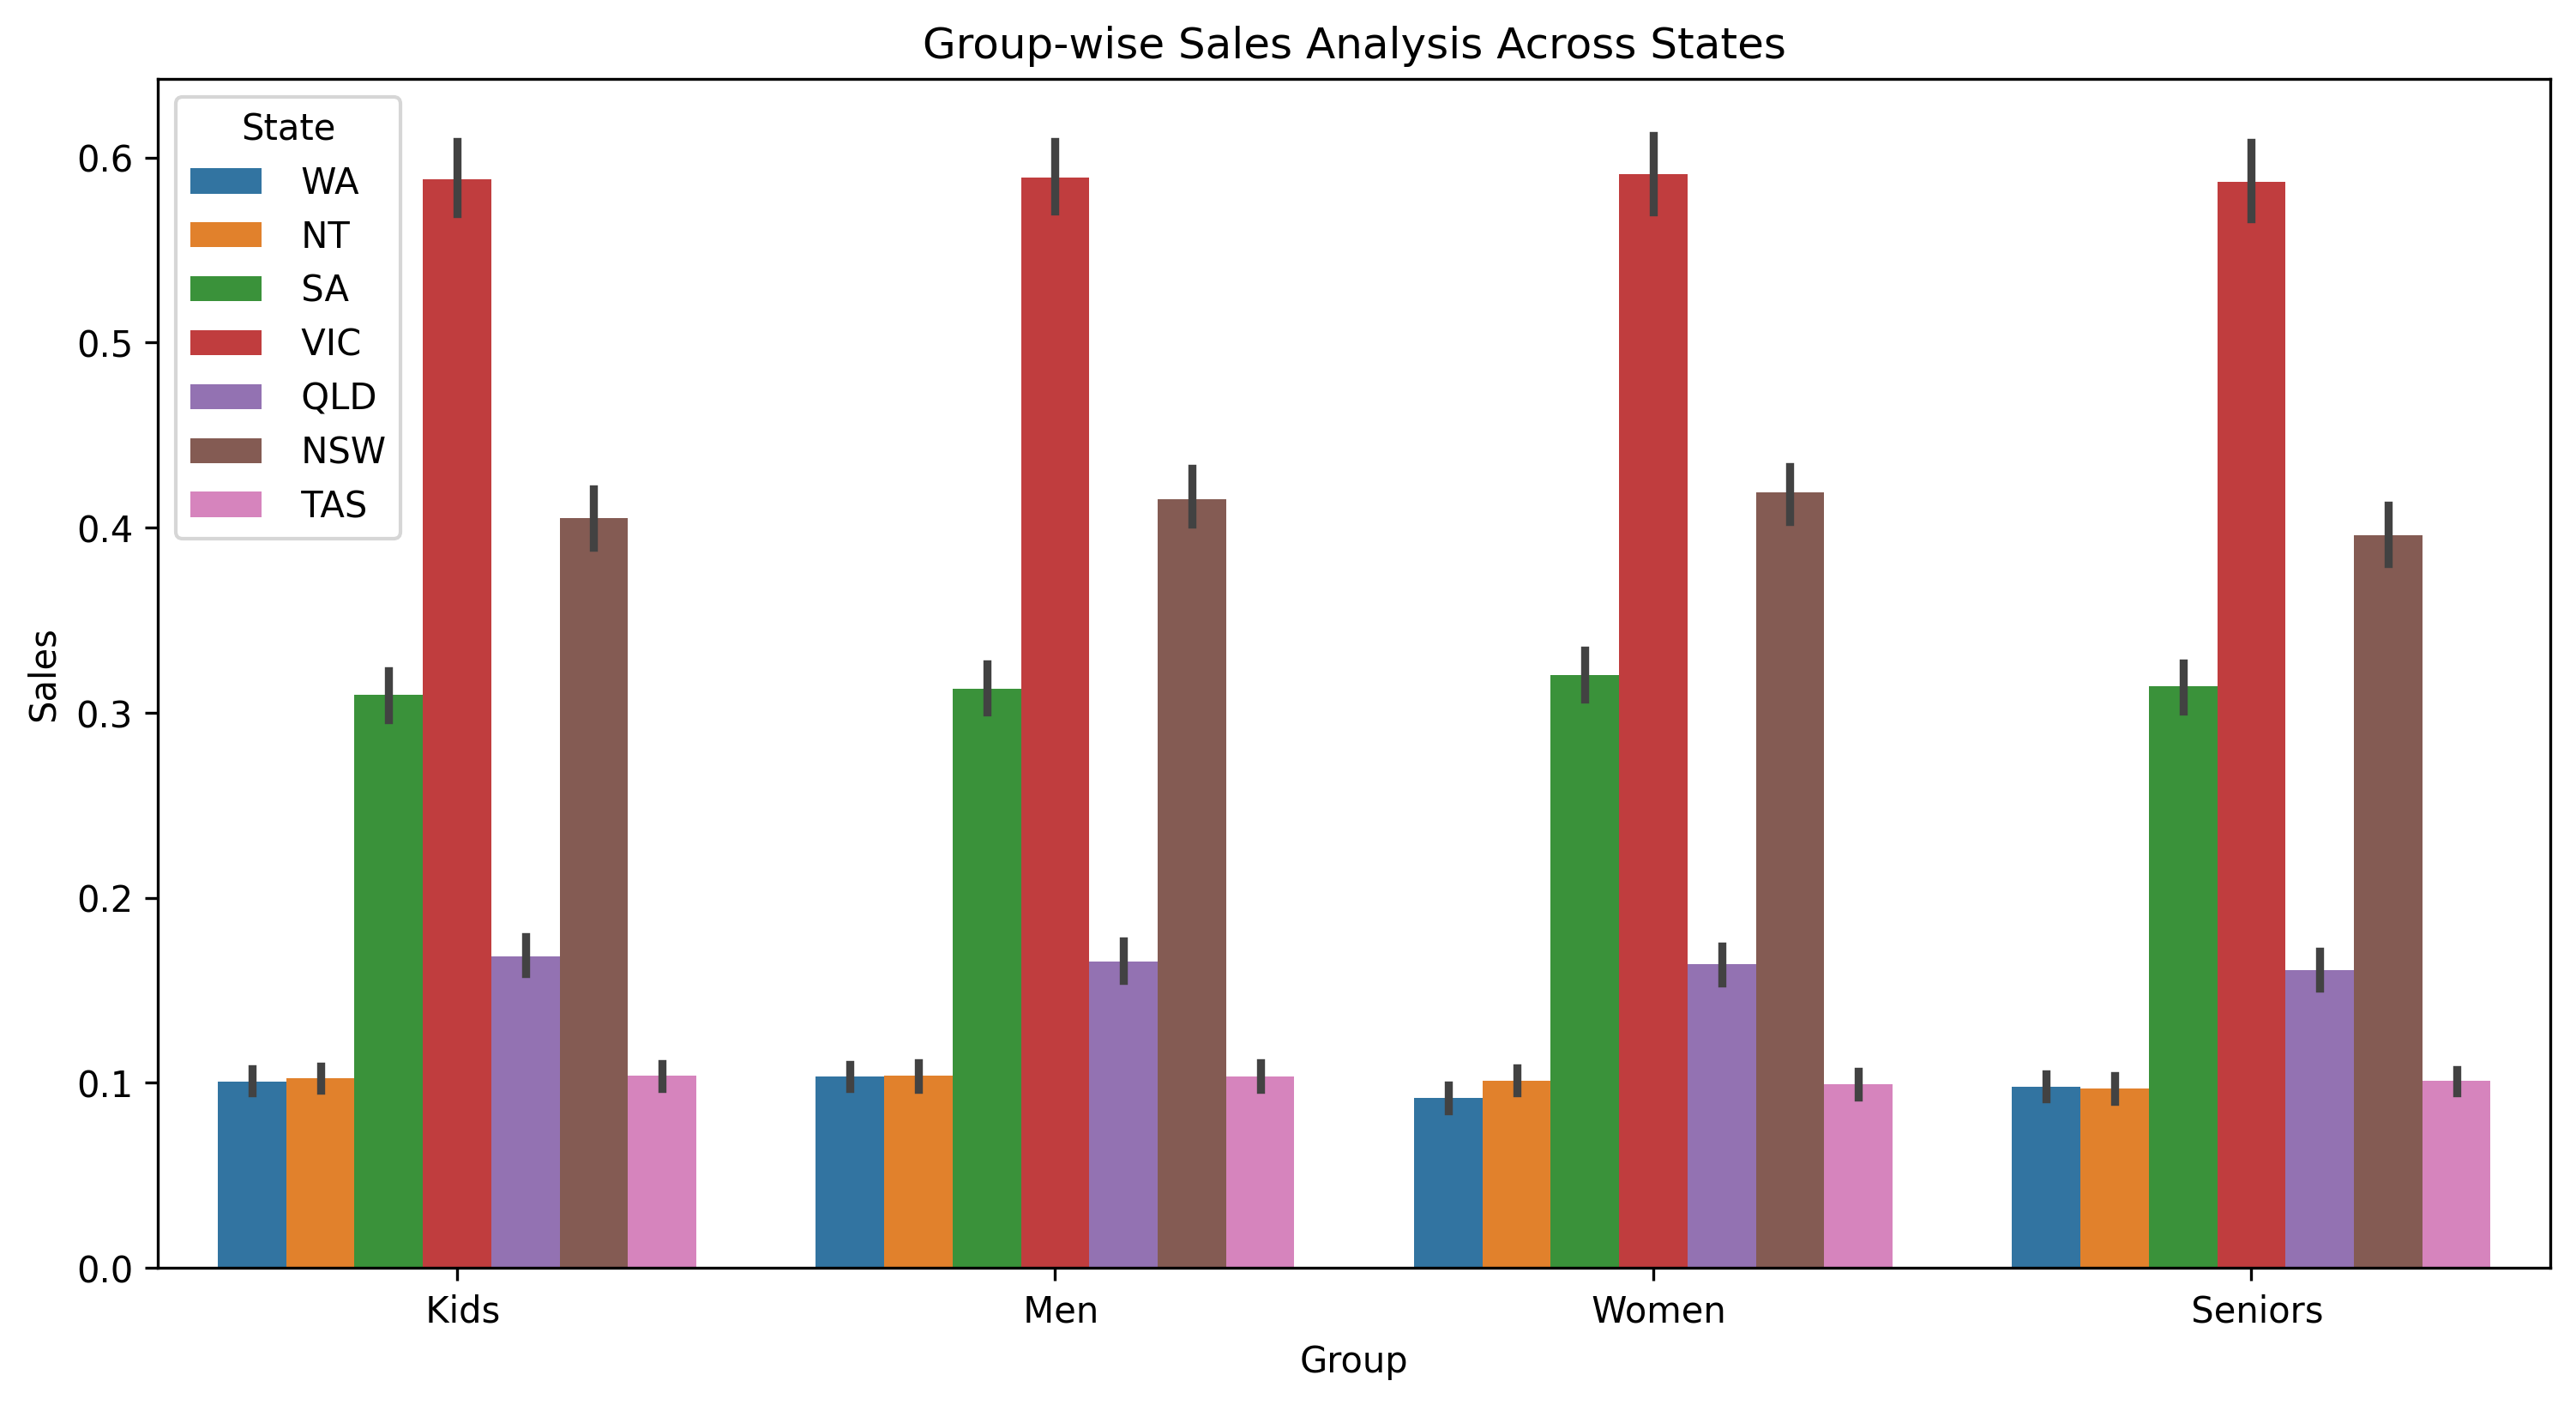

- Sales clustering by Group and State reveals targeted marketing potential for specific demographics in underperforming regions.

- Time resampling exposed a significant week-to-week swing in sales volume, valuable for agile planning and inventory control.

**Interpreting Graphs and Charts**

- Grouped bar plots across states highlighted the comparative advantage of different groups in each geography.

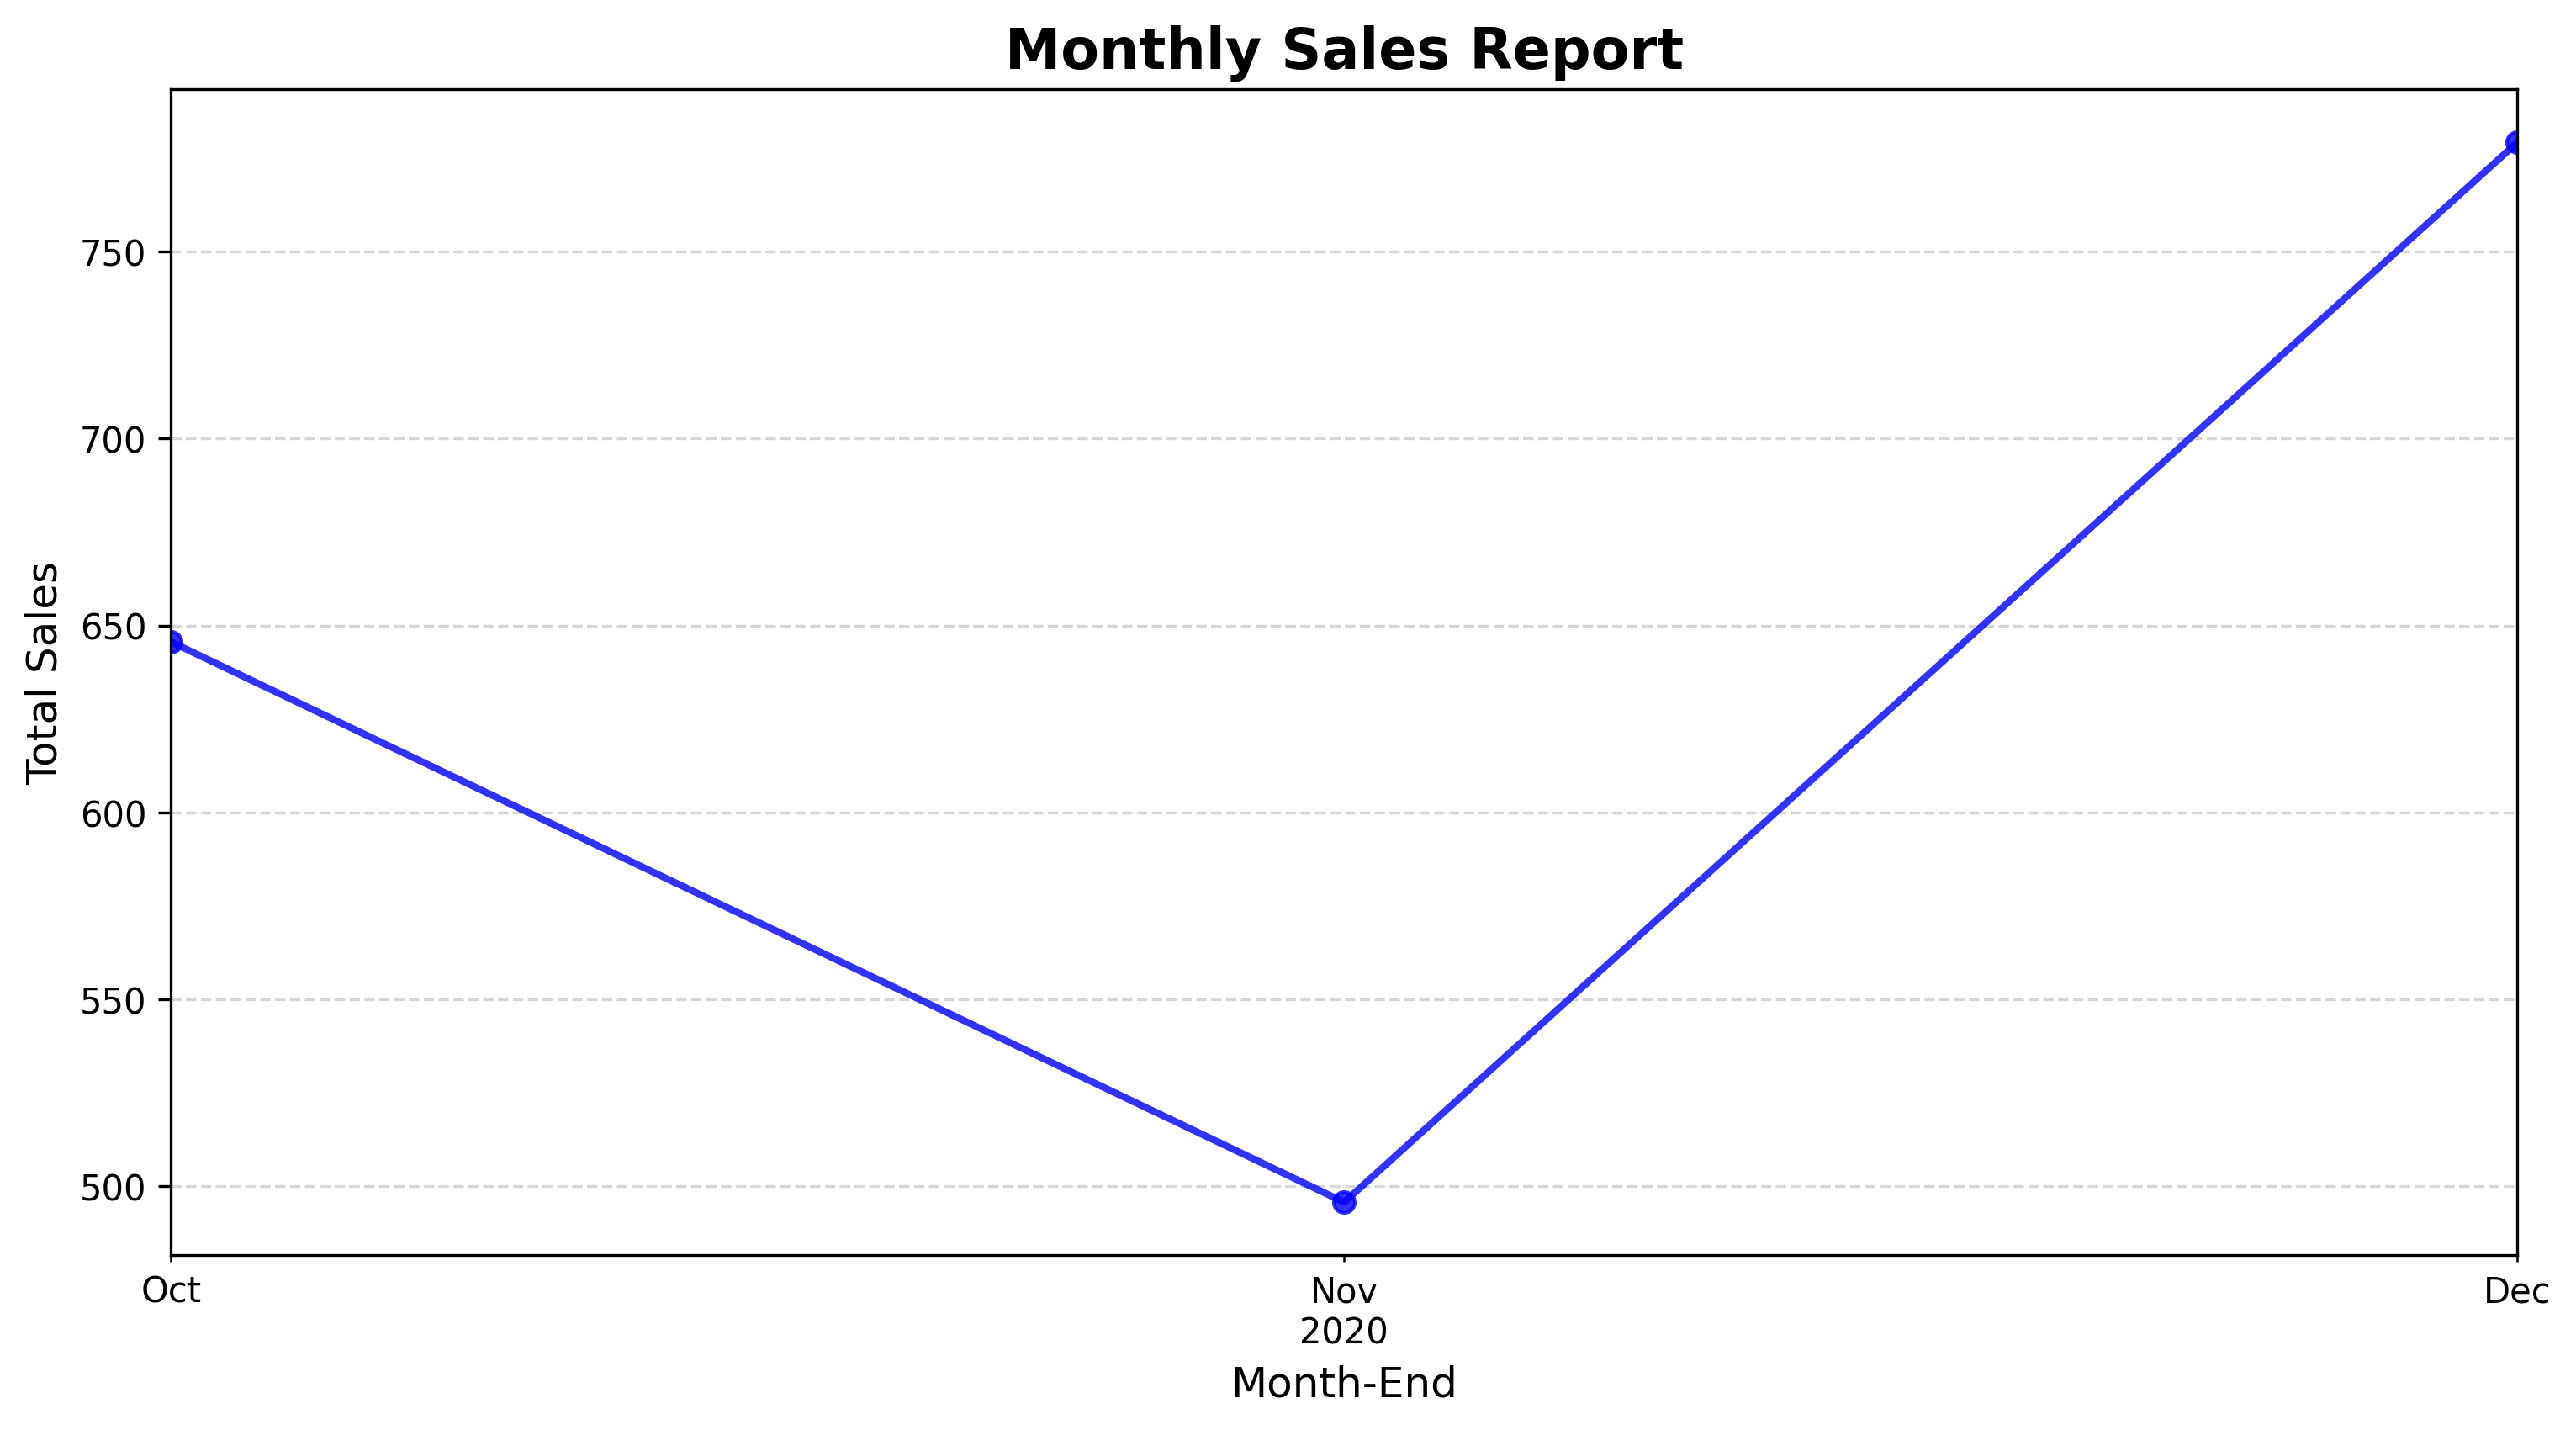

- Time series line plots captured seasonality and supported the detection of cyclical patterns (e.g., end-of-year peak).

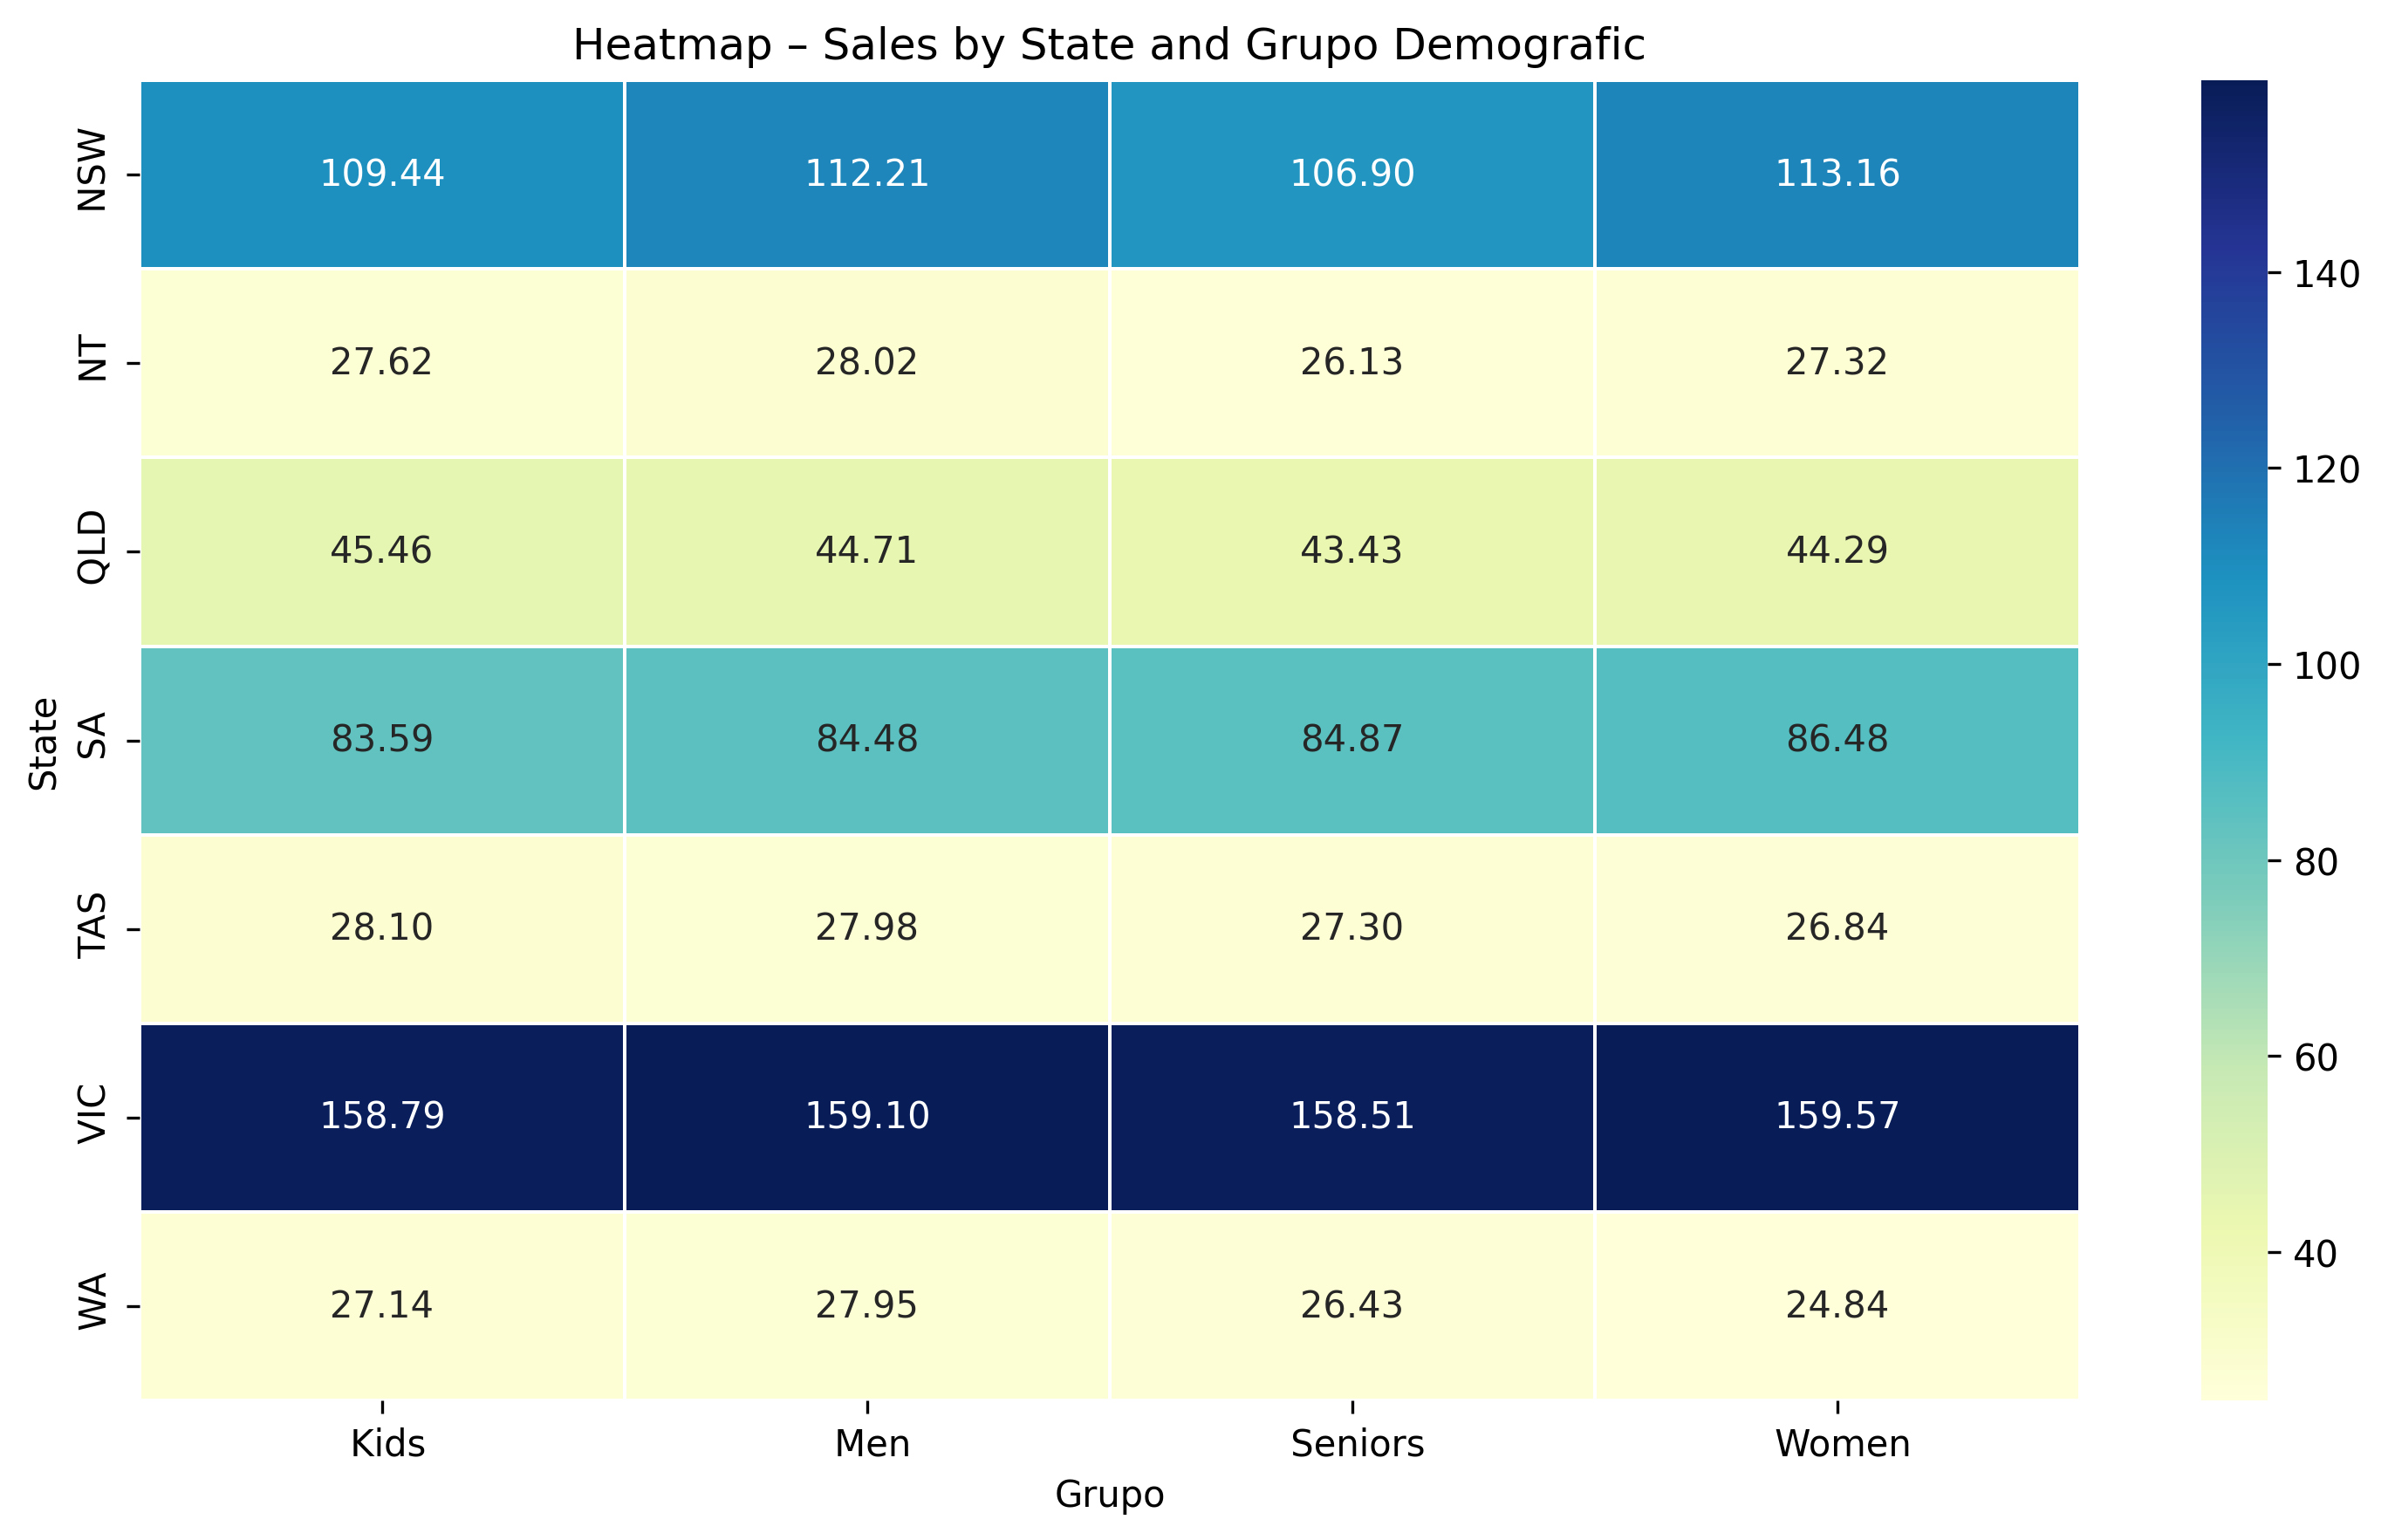

- Heatmaps emphasize intersections between State and Group performance.

**Conducting Hypothesis Testing**

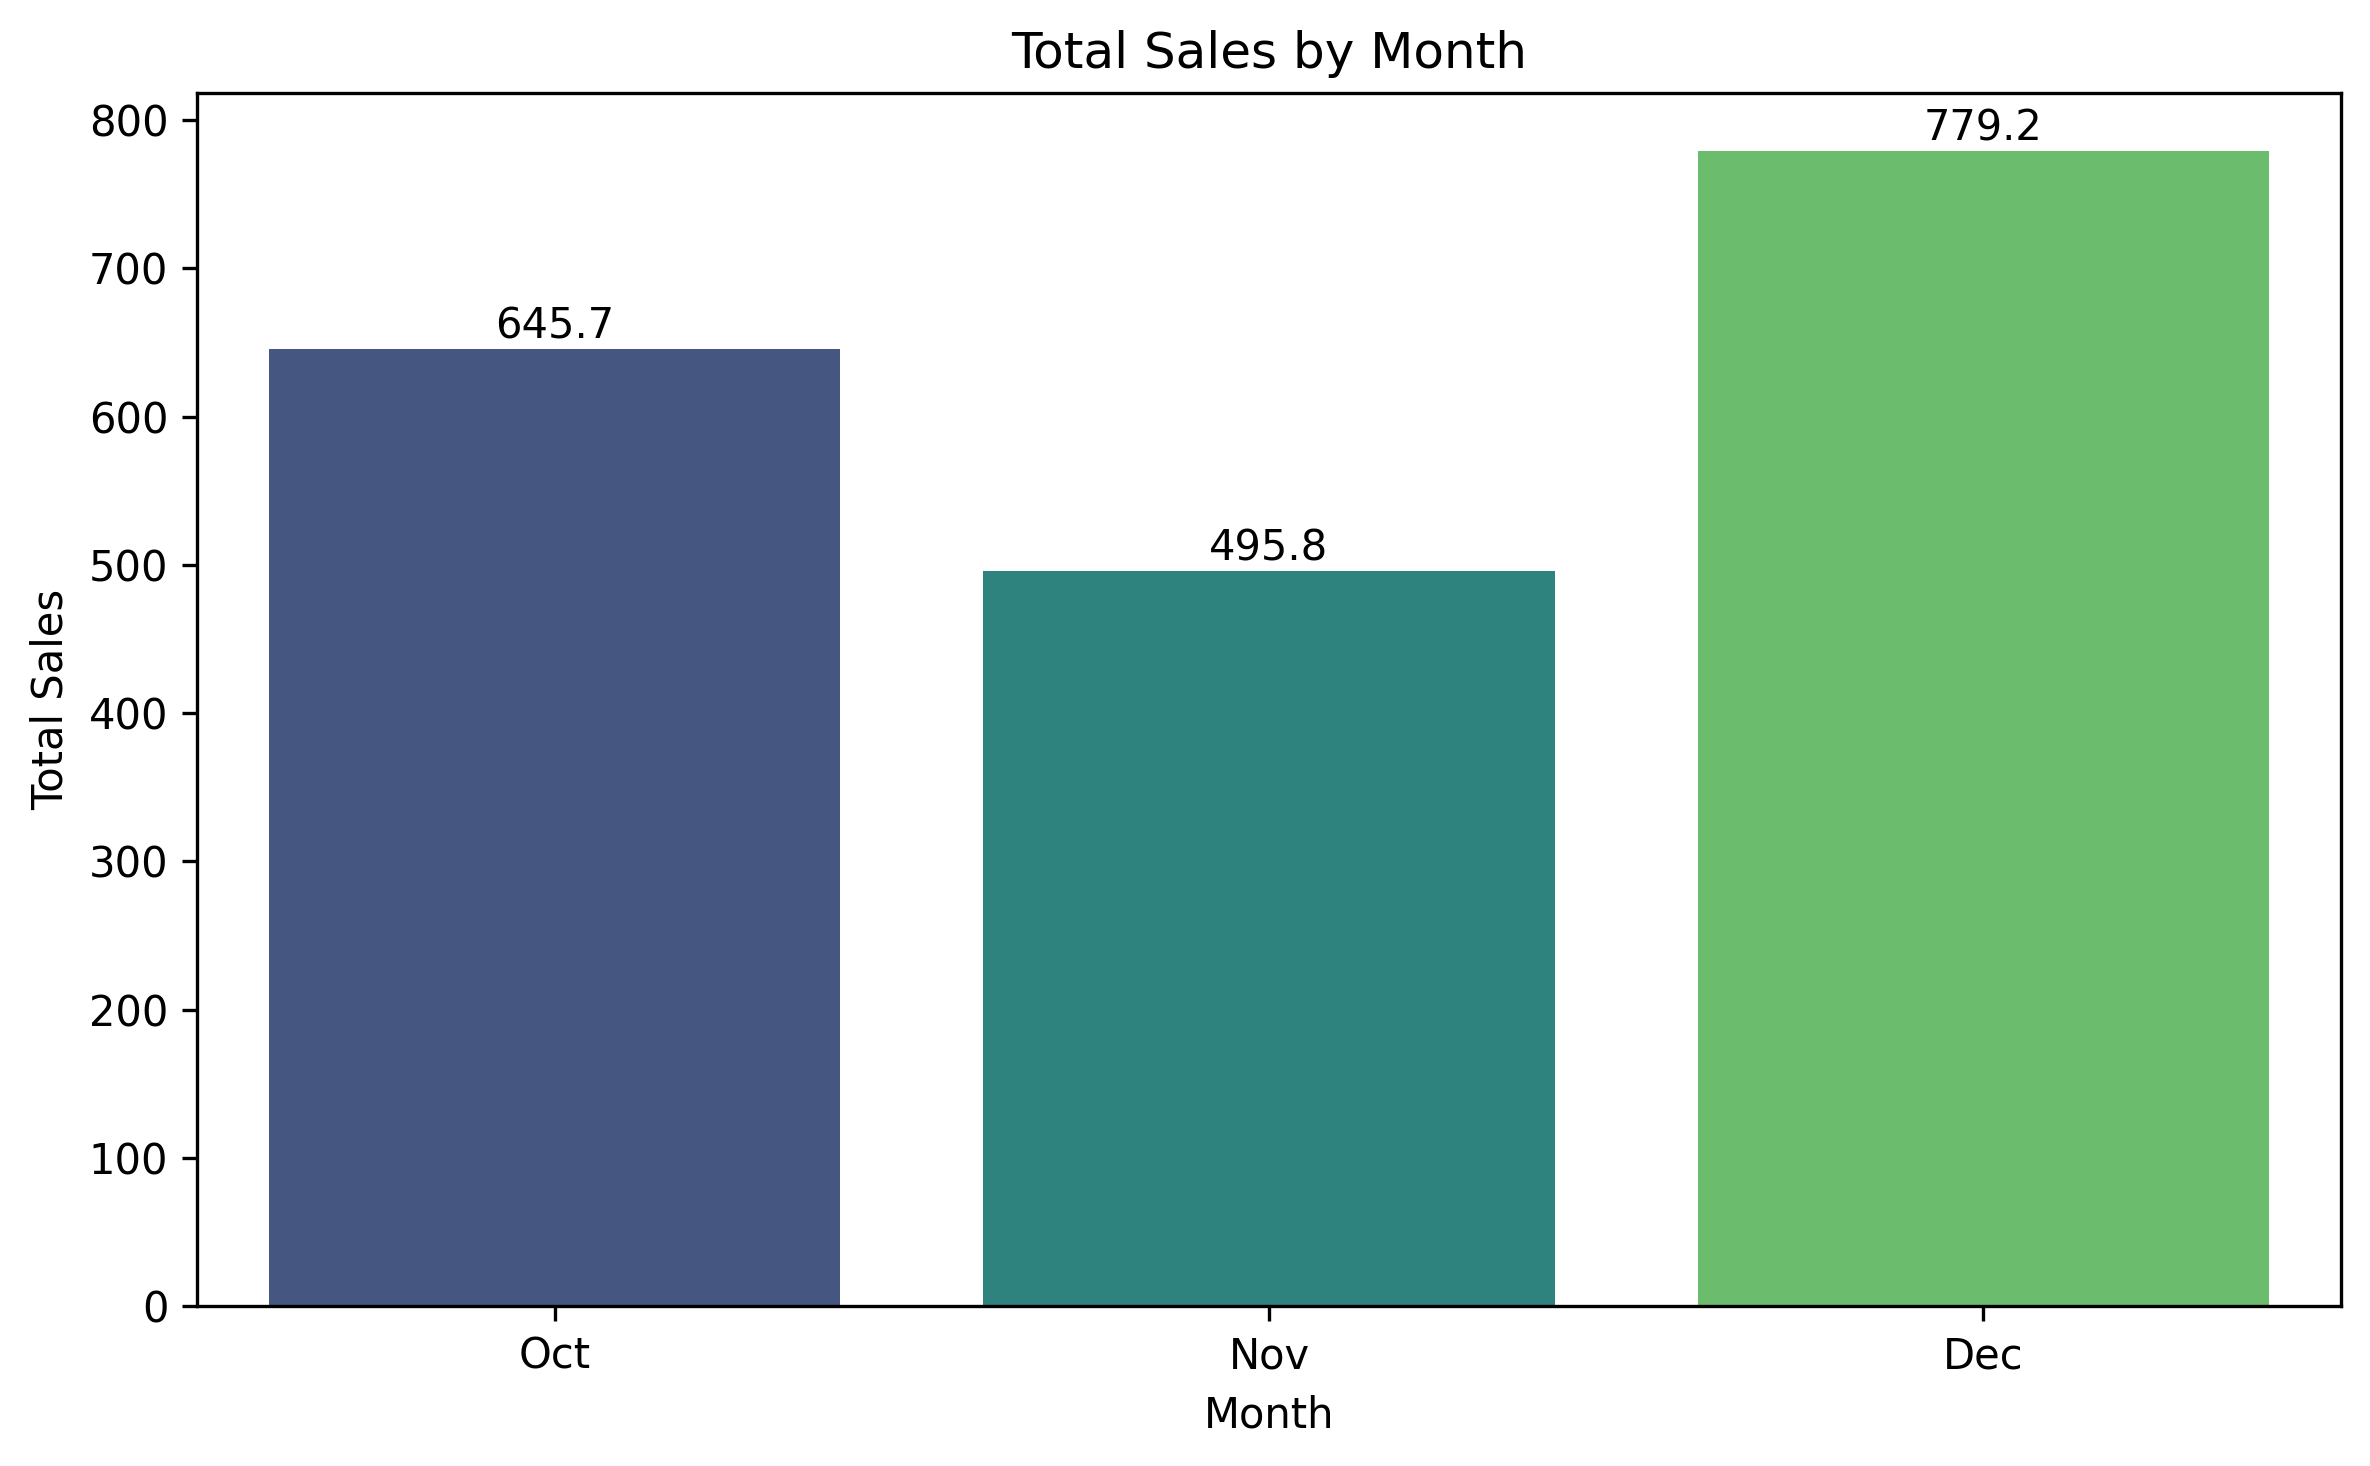

"December recorded the peak monthly sales."

**Why or Why Not?**
Sales peaked in December with a total of 779.28, likely influenced by seasonal demand. November registered the lowest performance with 495.8, confirming its position as an off-peak month in the sales cycle.

**Business Relevance**
- This data helps optimize marketing budgets by showing which demographics to prioritize per region.
- It underscores the value of seasonal promotions, especially around December.
- The clear data structure and lack of missing values allow for immediate deployment in forecasting or recommender systems.

**What Would Be Good for a Company to Know?**
- How demographic factors (Group) influence sales per geographic unit (State).
- That Seniors may require a different engagement approach due to lower responsiveness.
- Sales campaigns scheduled for the end of the fourth quarter (Q4) could deliver a strong return on investment (ROI); however, to validate this hypothesis more robustly, data from previous quarters would be required for comparison.

**What Insights Would Your Boss Want to Know?**
- Where are we underperforming by state or demographic?
- - States like NT, WA, and TAS reported the lowest total sales regardless of demographic group.
- - Among the groups, Seniors consistently underperformed across most regions — for instance, being the lowest in VIC, SA, and WA.
- - This highlights opportunities to revisit strategies targeting less responsive audiences or underperforming markets.

**What Did You Learn About the Dataset?**
- The dataset is well-structured, complete, and balanced.
- Group and temporal patterns are clear, suggesting logical customer behavior segmentation.
- There’s no need for additional imputation or cleaning, so your focus can remain on analysis and storytelling.

**What Story Does the Data Tell?**
- It paints a story of distinct seasonal sales behaviors, demographic buying patterns, and geographic disparities.
- At its heart, it's a tale of how timing, location, and audience intersect to influence consumer decisions, and how these insights can steer strategy forward.